In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd
import scipy.optimize as optimize


from bo_functions import ExactGPModel
from bo_functions import create_sse_data
from bo_functions import gen_y_Theta_GP
from bo_functions import bo_iter
from bo_functions import calc_y_exp
from bo_plotters import plot_xy

In [2]:
#Set Parameters
Theta_True = np.array([1,-1])
noise_std = 0.1**2
q = 2
BO_iters = 3
verbose = True
# BO_iters=10
# verbose= False
iterations = 300
explore_bias = torch.tensor([0,0.1,0.5])

#Pull Experimental data from CSV
exp_data_doc = "exp_data.csv"
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#For XY Data/GP Comparisons
X_line = np.linspace(np.min(Xexp),np.max(Xexp),100)
y_true = calc_y_exp(Theta_True, X_line, noise_std, noise_mean=0)
q_y = 3
title = "XY Comparison"

#Define GP Testing space
p=20
Theta1 =  np.linspace(0.5,1.5,p) #1x10
Theta2 =  np.linspace(-1.5,-0.5,p) #1x10
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


BO Iteration =  1
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.94434506 -1.06482354]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.93176607 -1.06174467]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



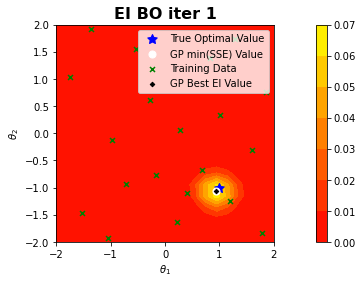

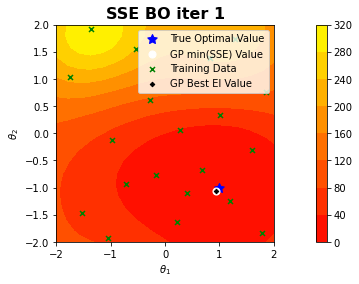

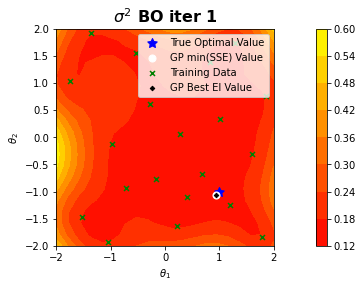

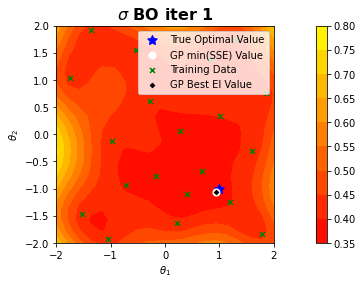

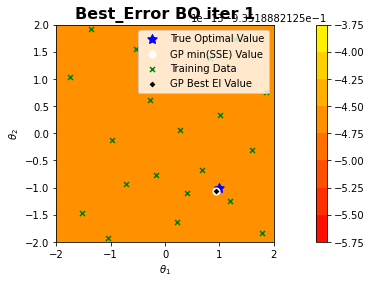

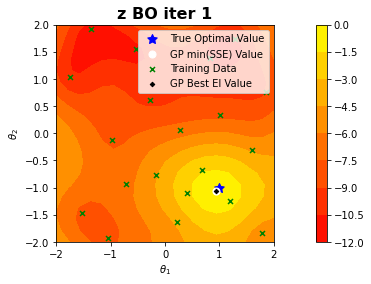

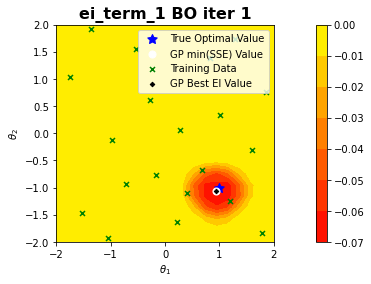

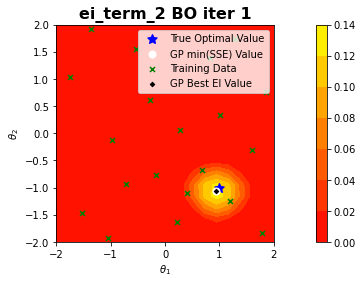

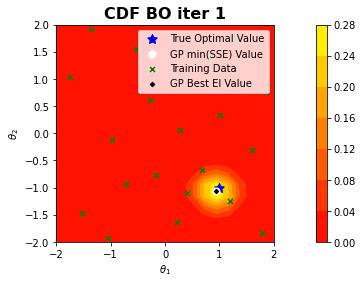

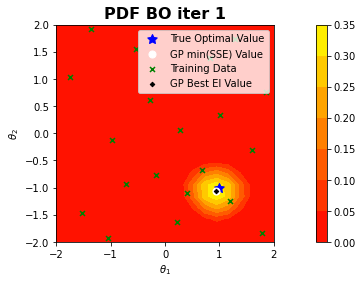

BO Iteration =  2
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.94736842 -1.15789474]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.98419335 -1.07493965]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



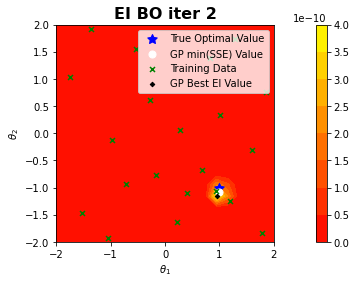

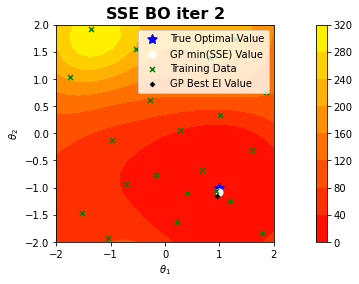

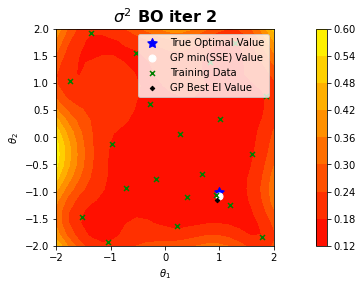

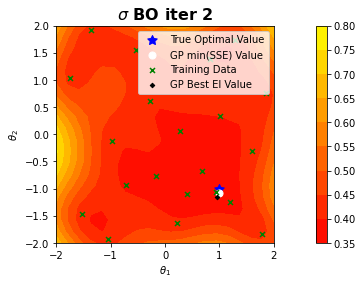

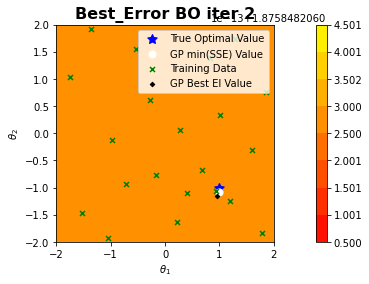

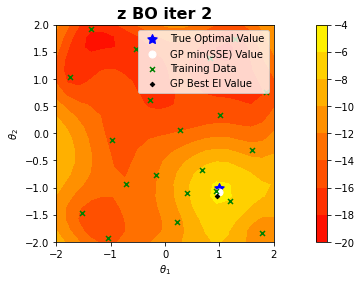

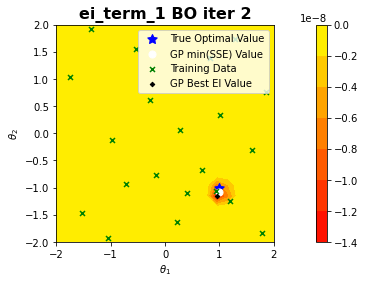

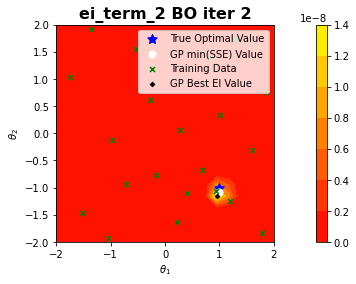

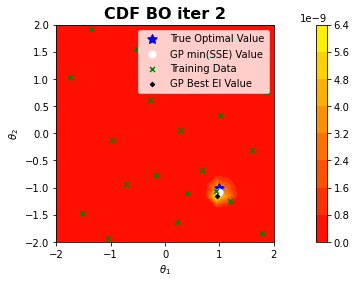

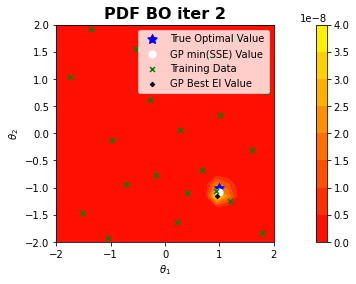

BO Iteration =  3
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.94736842 -1.15789474]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.98671689 -1.08257275]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



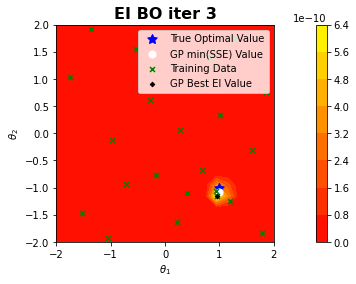

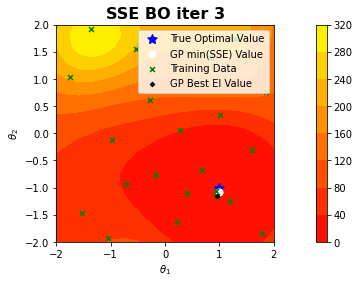

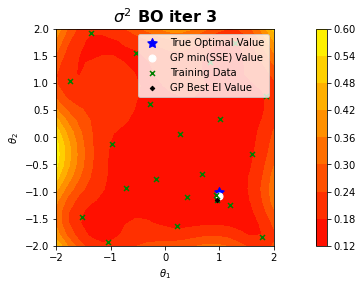

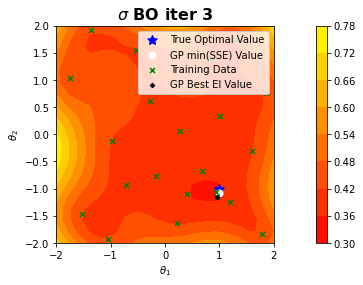

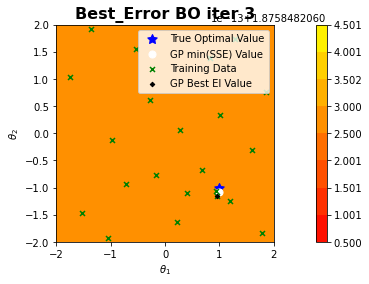

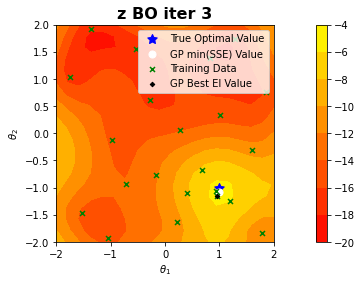

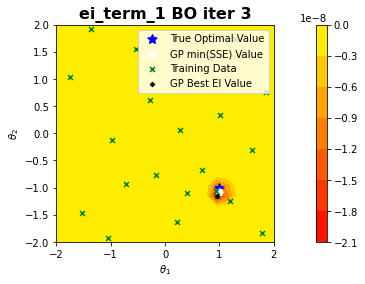

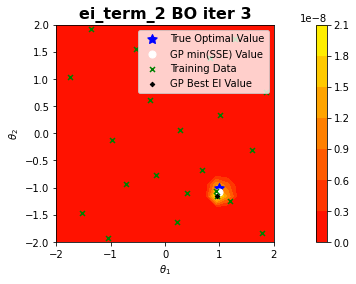

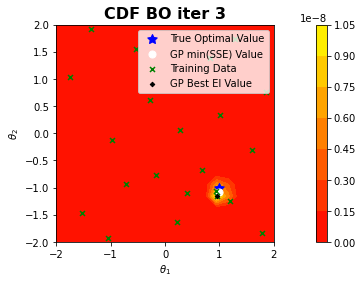

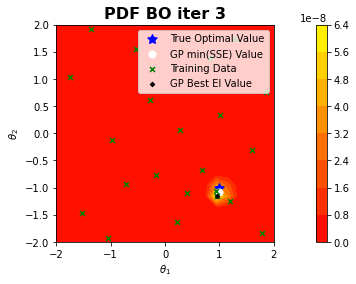

Results (array([ 0.94736842, -1.15789474]), array([ 0.98671689, -1.08257275]))


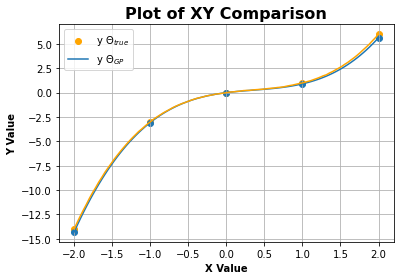

Magnitude of SSE given Theta_Opt =  [ 0.98671689 -1.08257275] is 2.1400e-01
BO Iteration =  1
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.94648904 -1.06535455]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.93176607 -1.06174467]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



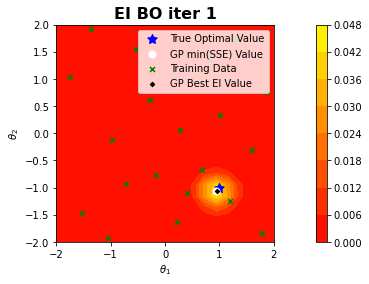

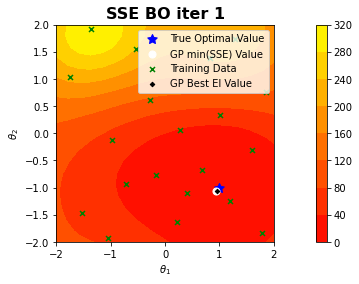

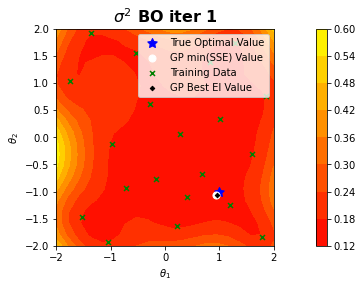

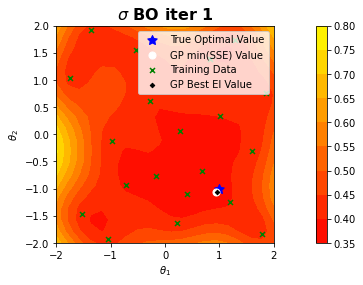

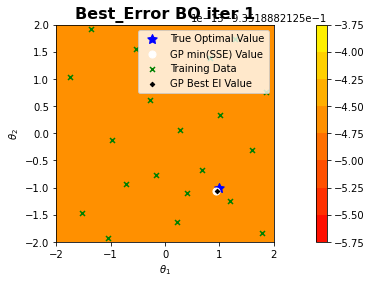

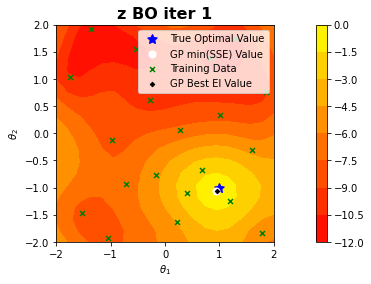

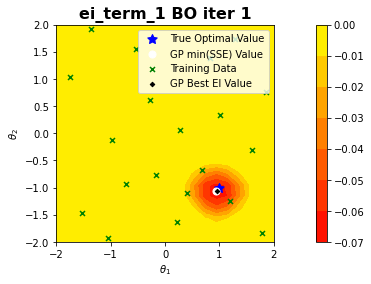

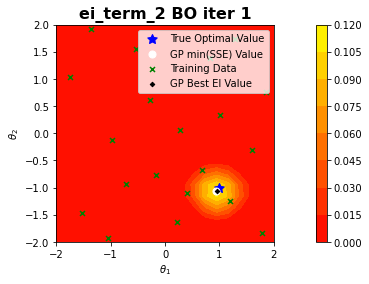

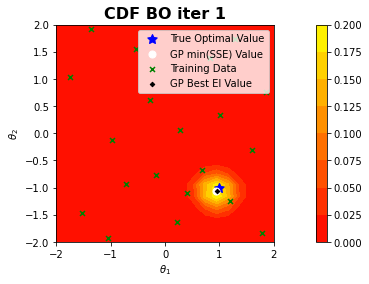

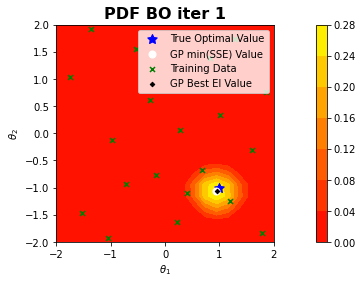

BO Iteration =  2
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.94736842 -1.15789474]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.98514271 -1.07516302]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



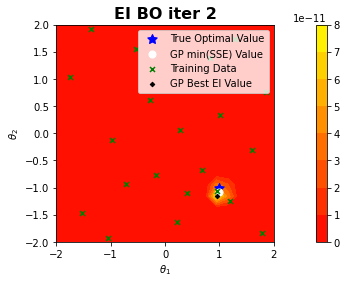

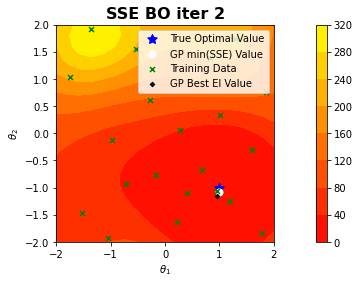

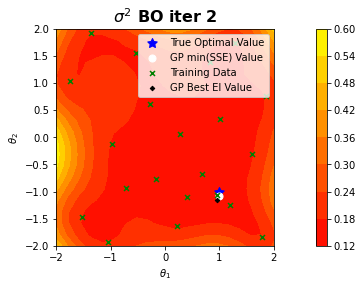

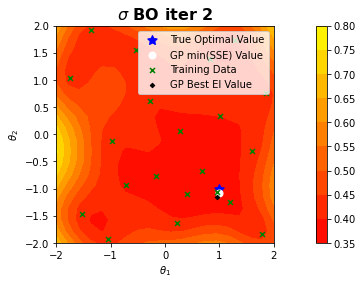

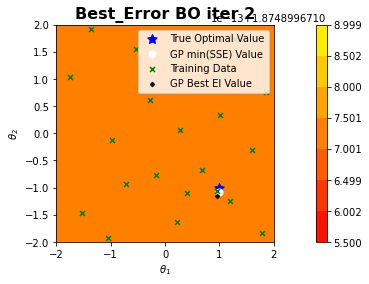

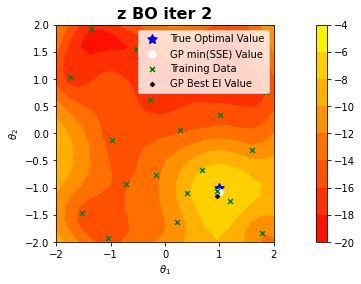

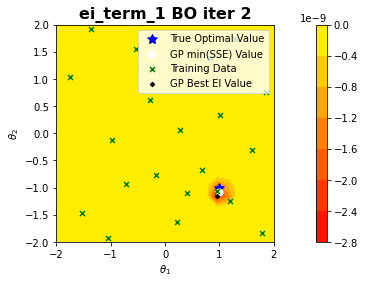

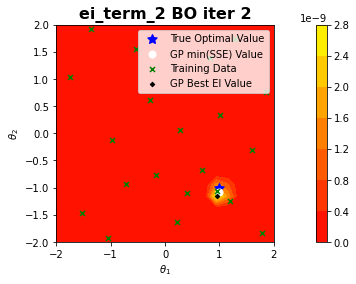

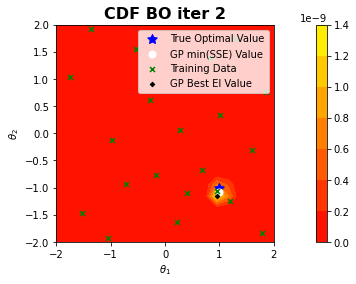

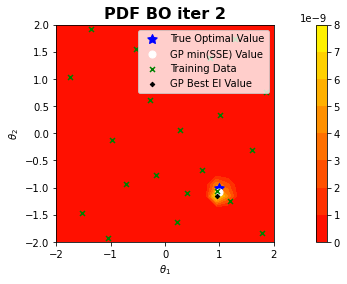

BO Iteration =  3
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.94736842 -1.15789474]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.98758259 -1.08277521]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



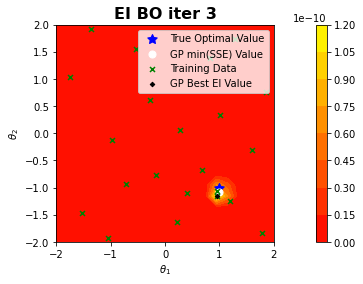

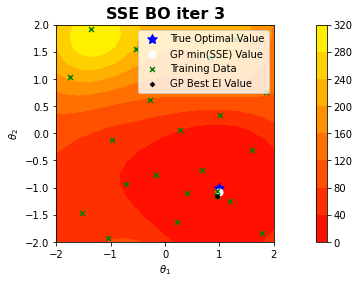

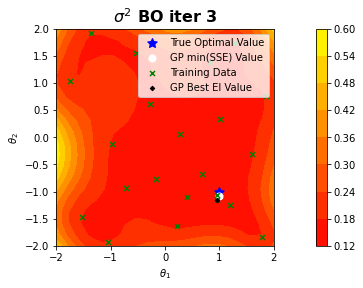

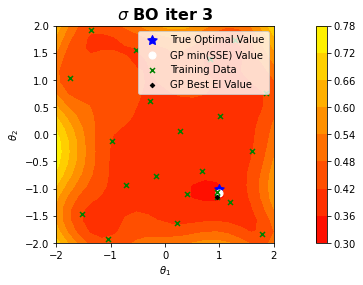

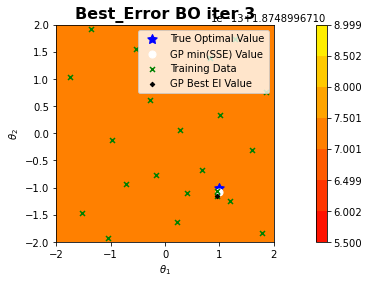

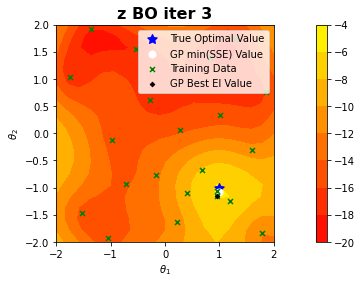

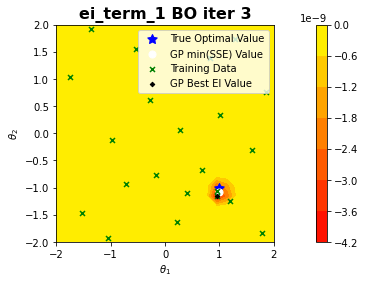

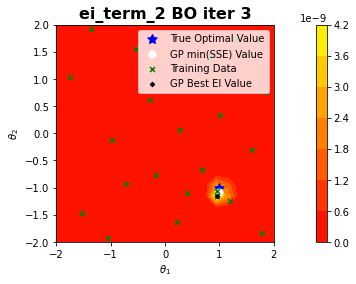

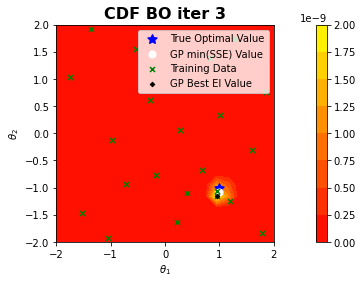

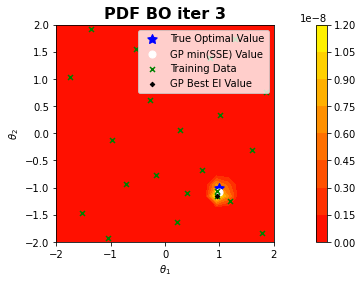

Results (array([ 0.94736842, -1.15789474]), array([ 0.98758259, -1.08277521]))


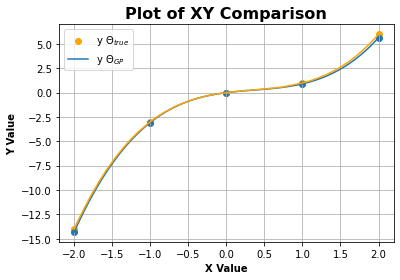

Magnitude of SSE given Theta_Opt =  [ 0.98758259 -1.08277521] is 2.1497e-01
BO Iteration =  1
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.95594541 -1.06770565]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.93176607 -1.06174467]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



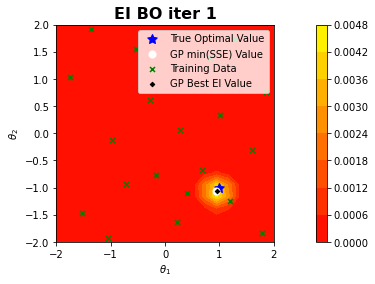

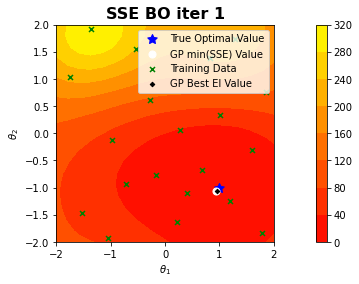

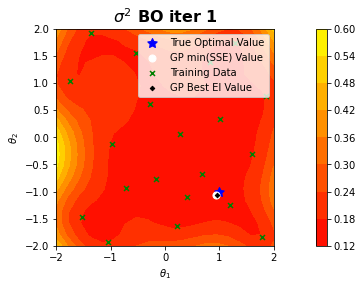

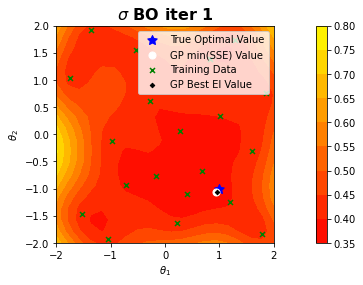

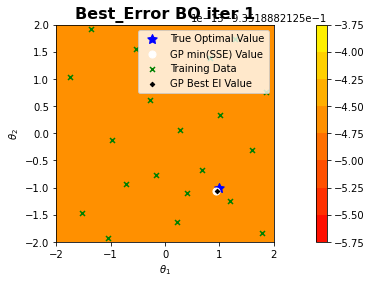

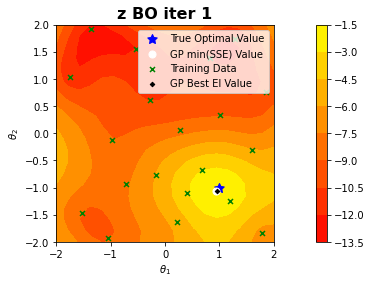

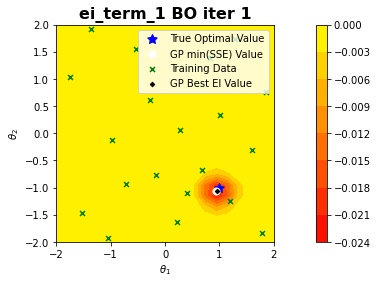

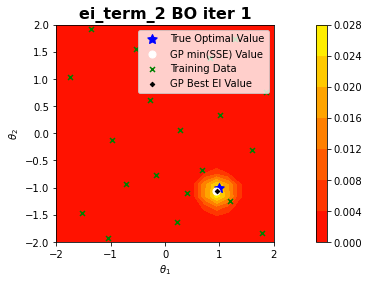

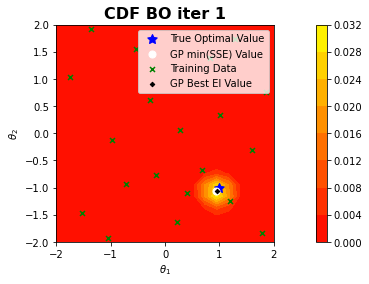

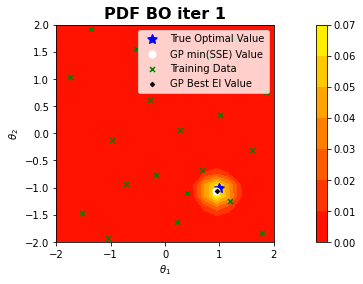

BO Iteration =  2
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.94736842 -1.15789474]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.98923839 -1.07611231]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



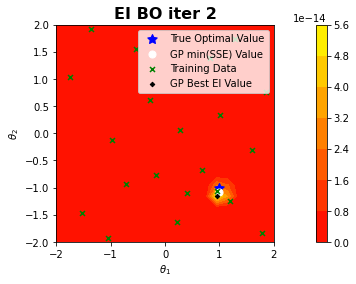

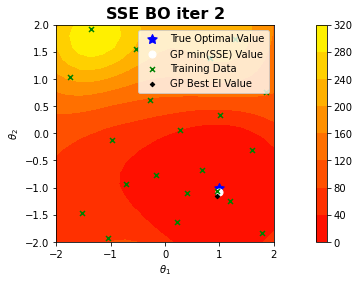

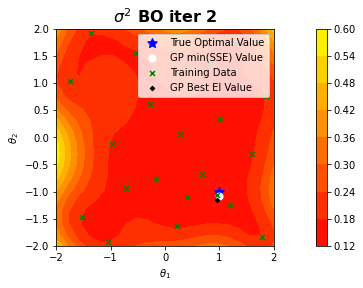

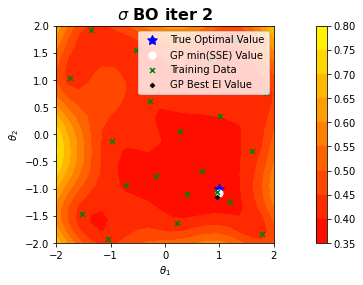

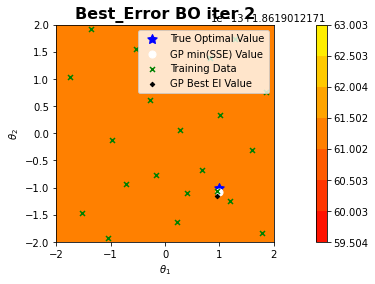

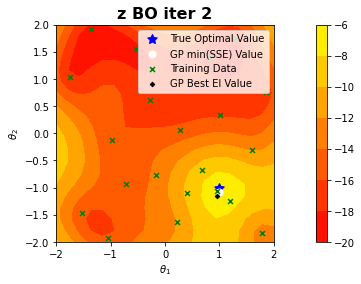

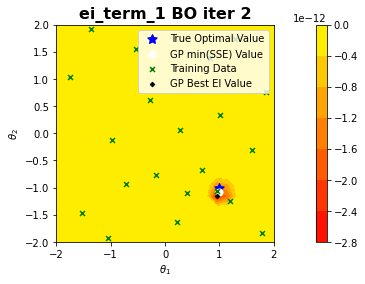

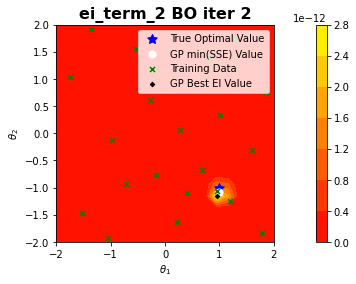

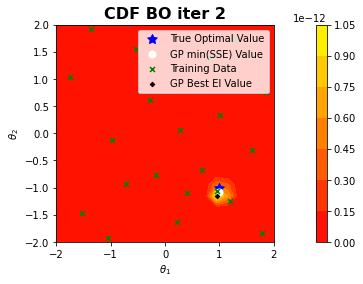

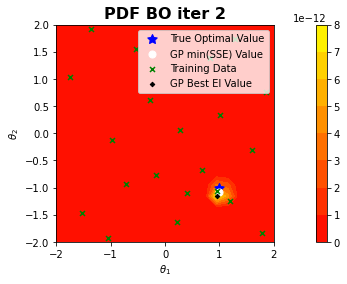

BO Iteration =  3
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.94736842 -1.15789474]
Argmax Theta Best =  [ 0.94736842 -1.15789474]
Scipy Theta Opt =  [ 0.9913306  -1.08369536]
Argmin Theta_Opt_GP =  [ 0.94736842 -1.15789474] 



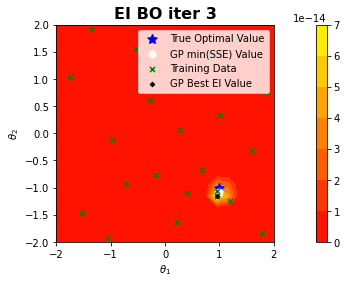

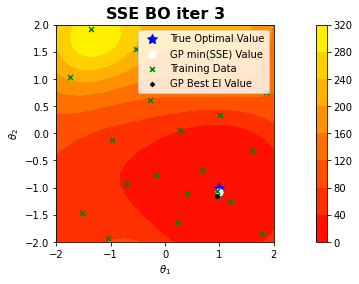

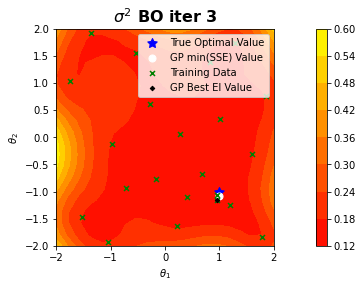

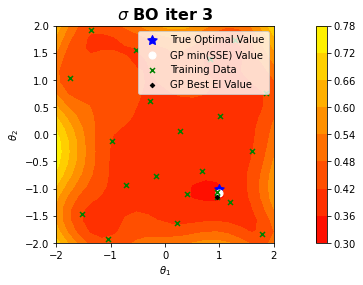

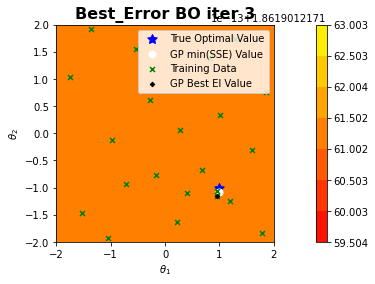

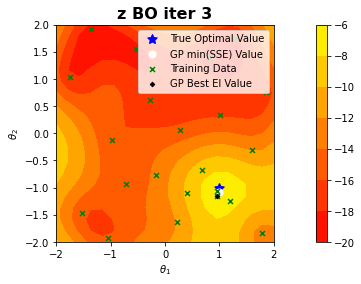

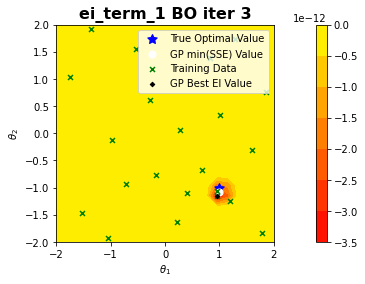

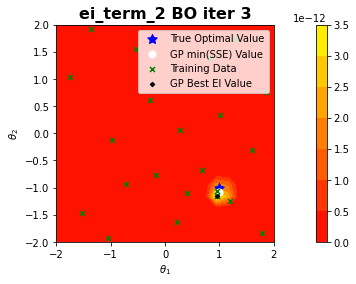

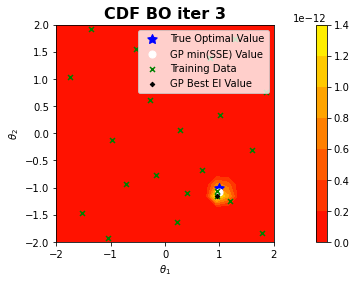

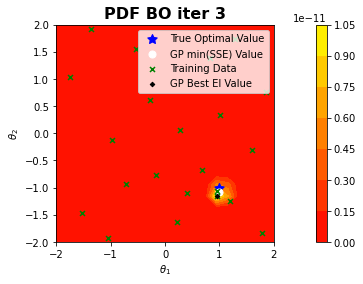

Results (array([ 0.94736842, -1.15789474]), array([ 0.9913306 , -1.08369536]))


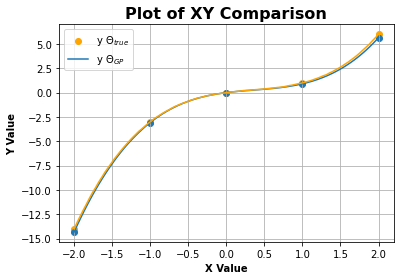

Magnitude of SSE given Theta_Opt =  [ 0.9913306  -1.08369536] is 2.1963e-01


In [3]:
##Objective function = ln(SSE)
##USING SCIPY METHOD
##Uses 19 LHS points

save_fig=True
obj = "LN_obj"

#Pull training data from CSV
train_data_doc = "train_2_ln_obj_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_ln_sse = torch.tensor(train_data[:,-1])
t =len(train_T) #Desired number of training points
# t = 4 #Set t=4 to show changing EI
train_T = train_T[0:t]
train_ln_sse = train_ln_sse[0:t]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_ln_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_ln_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose, save_fig)
    print("Results",BO_Results)
    
    y_GP_Opt = gen_y_Theta_GP(Xexp, BO_Results, q = q_y)
    y_GP_Opt_100 = gen_y_Theta_GP(X_line, BO_Results, q = q_y)                         
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_GP_Opt_100,y_true, title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", "{:.4e}".format(Error_mag))

BO Iteration =  1
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.52148803 -1.06522461]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.69894633 -0.85902194]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



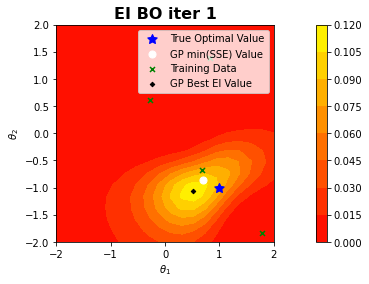

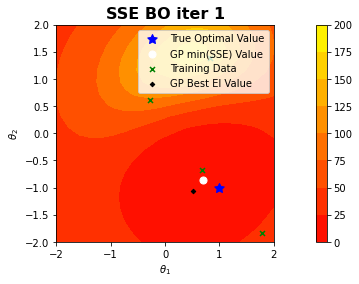

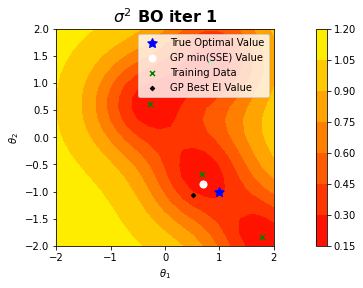

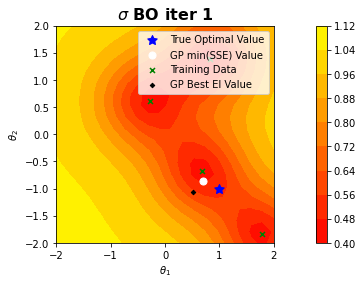

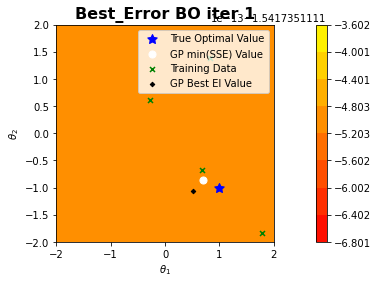

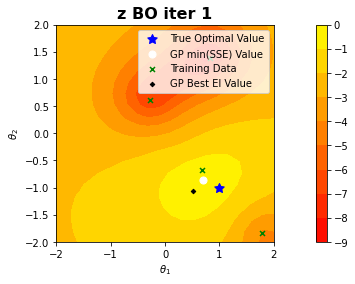

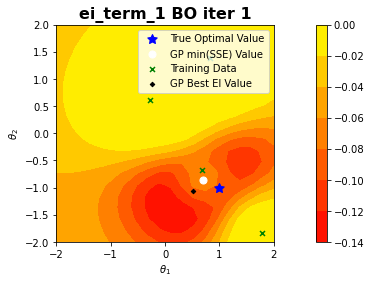

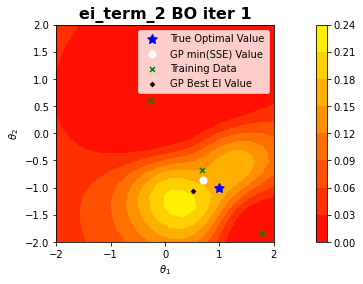

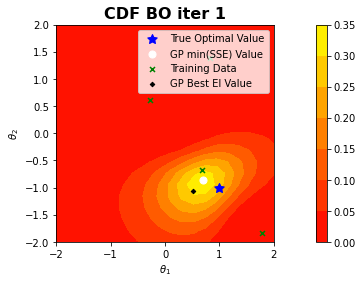

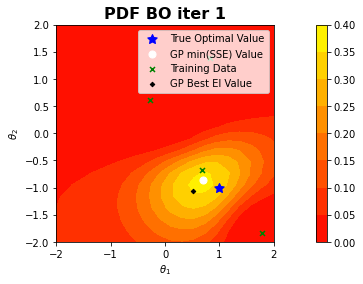

BO Iteration =  2
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.27677949 -1.29043465]
Argmax Theta Best =  [ 0.31578947 -1.36842105]
Scipy Theta Opt =  [ 0.44946706 -1.14891024]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



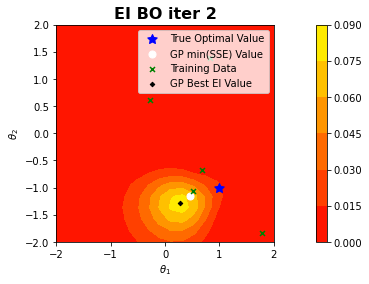

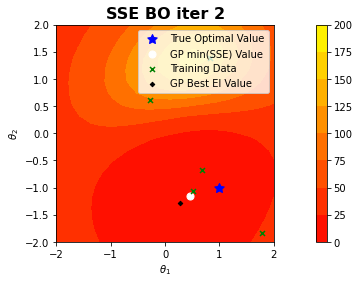

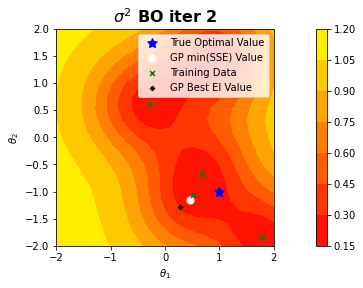

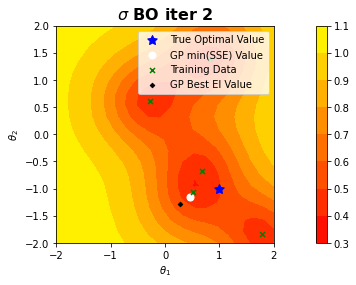

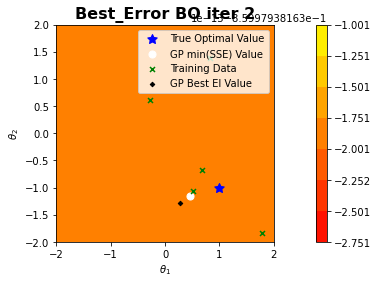

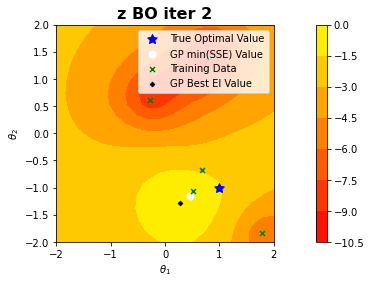

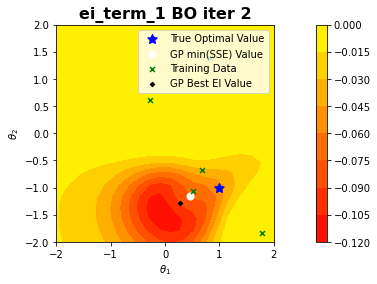

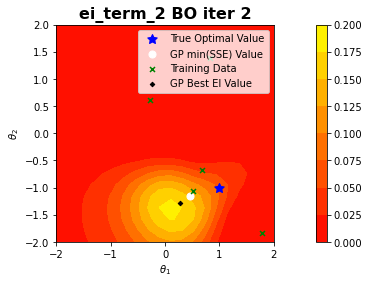

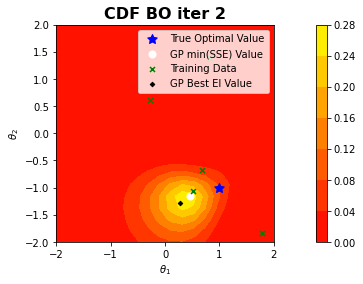

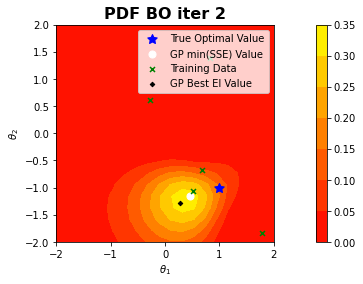

BO Iteration =  3
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.88994816 -0.96933318]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.69426873 -0.96073216]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



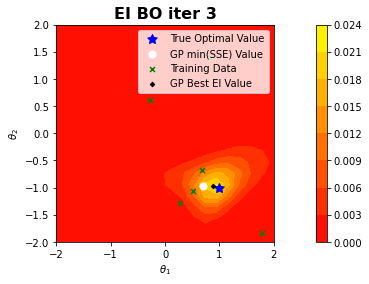

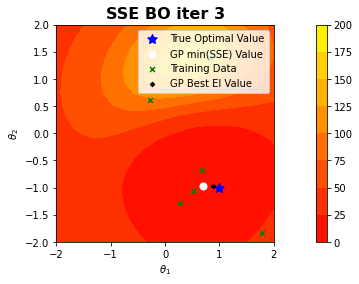

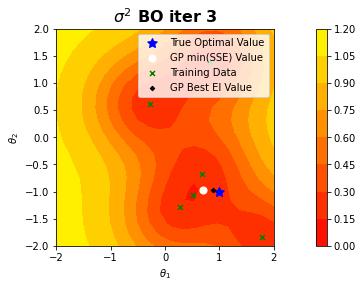

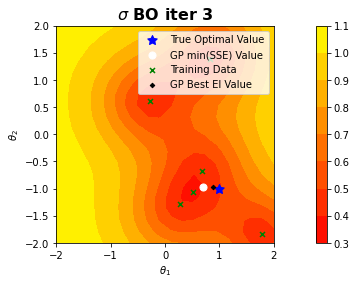

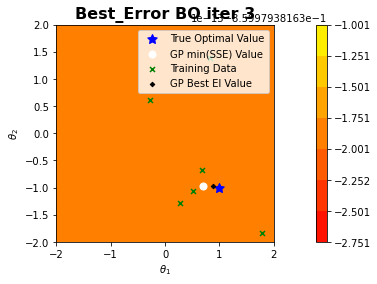

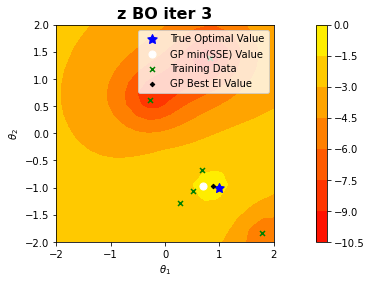

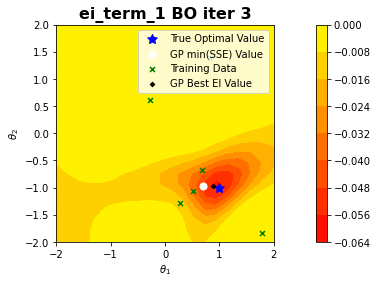

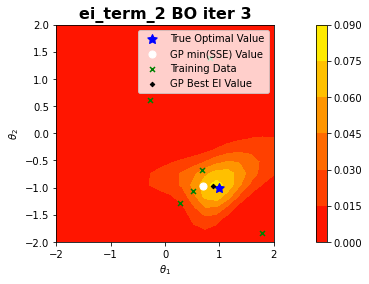

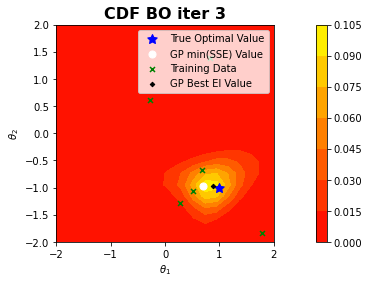

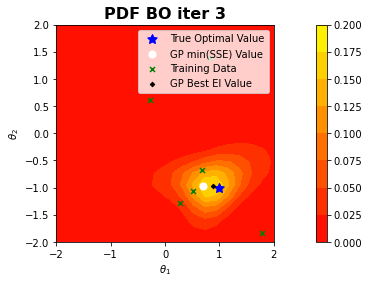

Results (array([ 0.88994816, -0.96933318]), array([ 0.69426873, -0.96073216]))


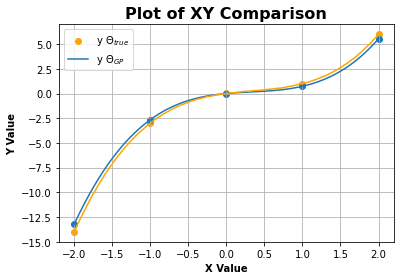

Magnitude of SSE given Theta_Opt =  [ 0.69426873 -0.96073216] is 9.6028e-01
BO Iteration =  1
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.47459474 -1.10580222]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.69894633 -0.85902194]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



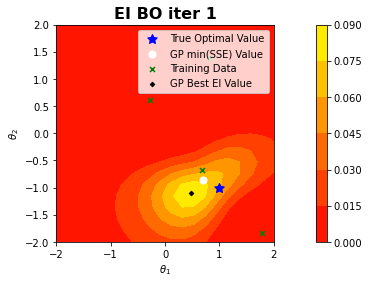

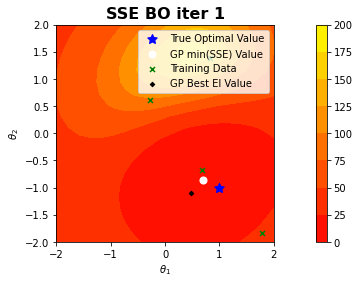

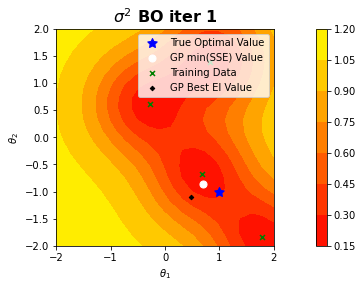

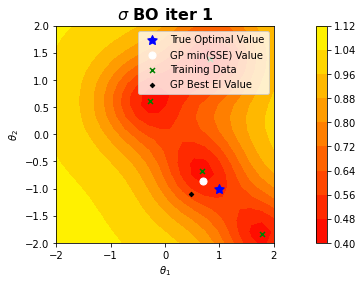

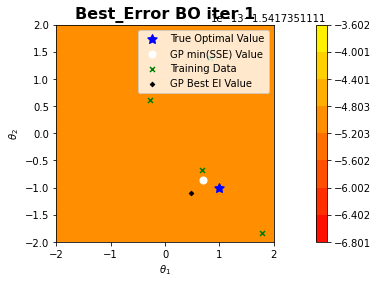

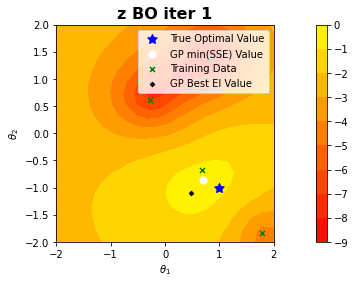

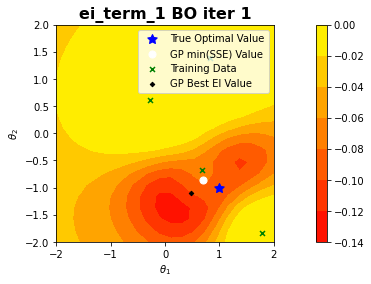

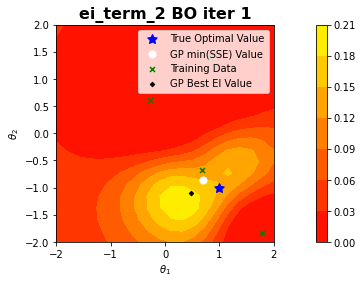

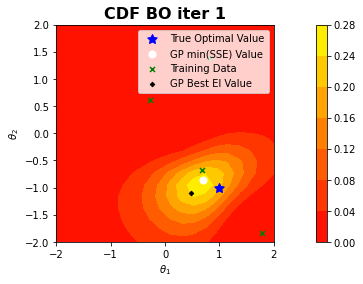

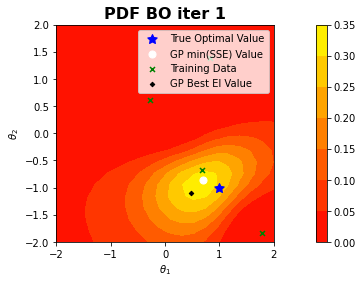

BO Iteration =  2
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.31030942 -1.22764981]
Argmax Theta Best =  [ 0.31578947 -1.15789474]
Scipy Theta Opt =  [ 0.47998103 -1.098286  ]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



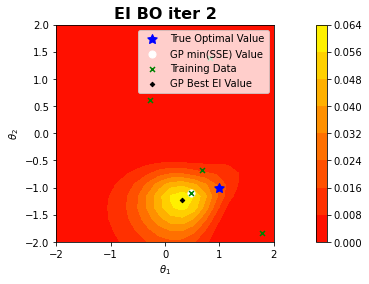

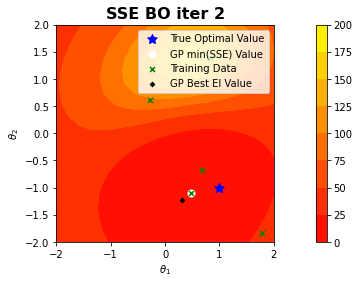

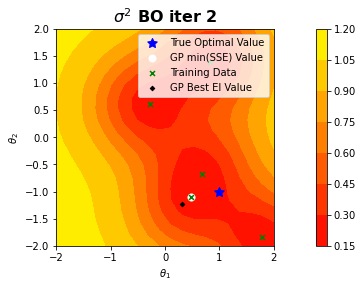

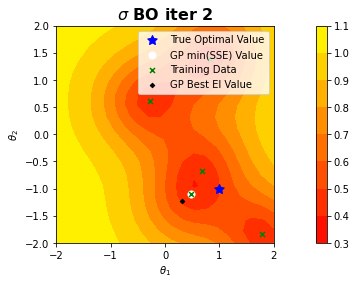

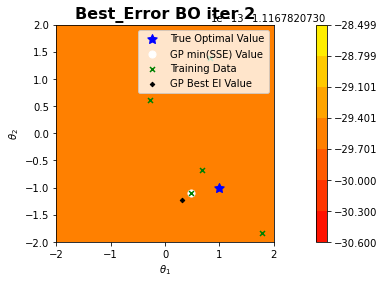

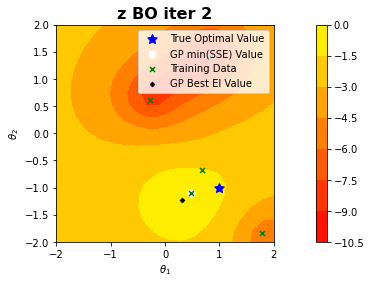

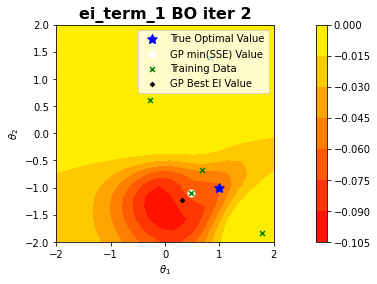

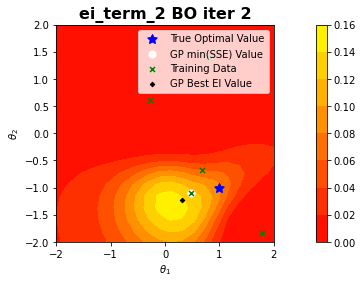

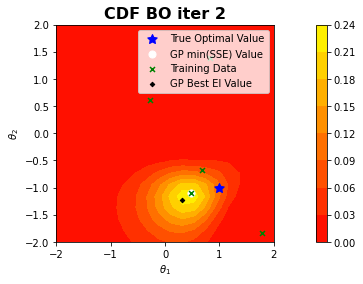

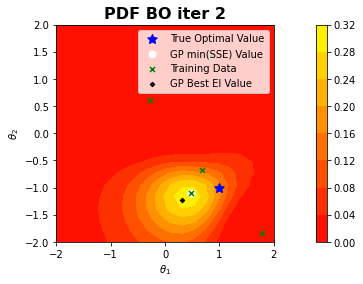

BO Iteration =  3
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.80857141 -1.01047117]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.61948404 -0.99557208]
Argmin Theta_Opt_GP =  [ 0.52631579 -0.94736842] 



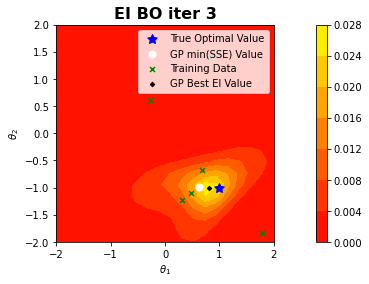

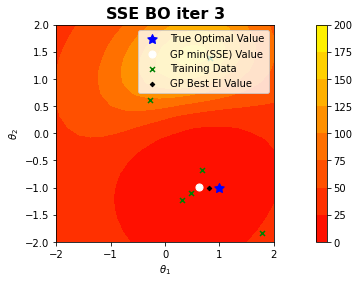

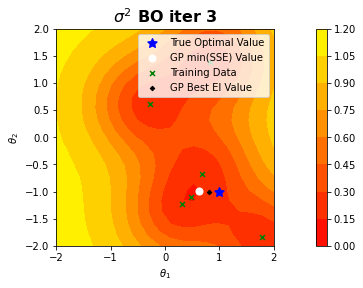

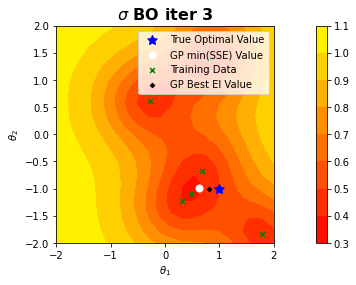

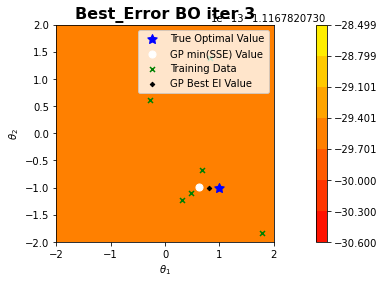

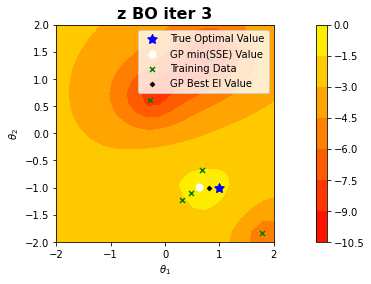

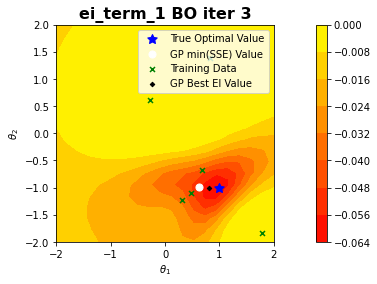

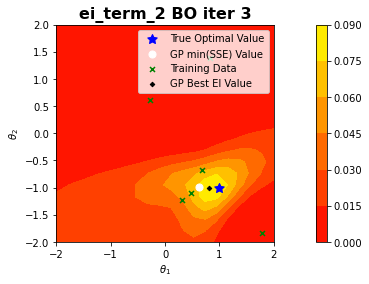

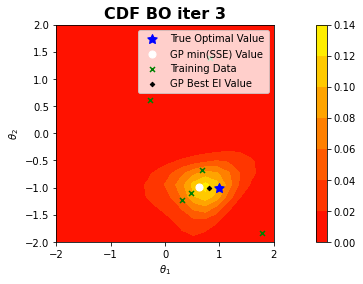

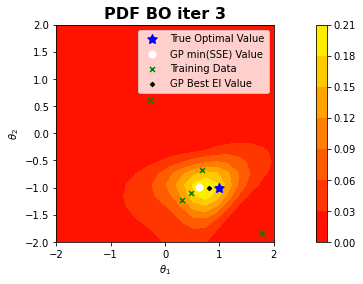

Results (array([ 0.80857141, -1.01047117]), array([ 0.61948404, -0.99557208]))


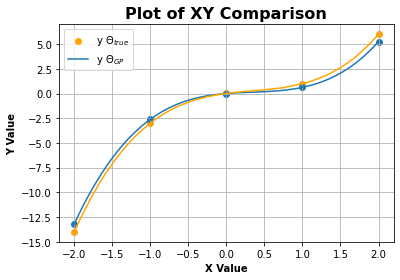

Magnitude of SSE given Theta_Opt =  [ 0.61948404 -0.99557208] is 1.4049e+00
BO Iteration =  1
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.31677361 -1.23814878]
Argmax Theta Best =  [ 0.31578947 -1.15789474]
Scipy Theta Opt =  [ 0.69894633 -0.85902194]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



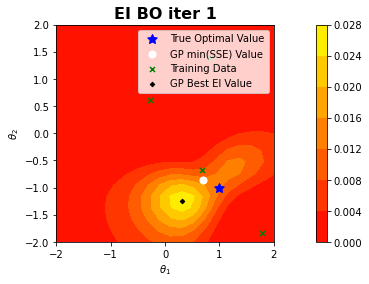

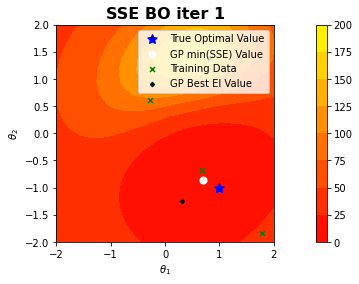

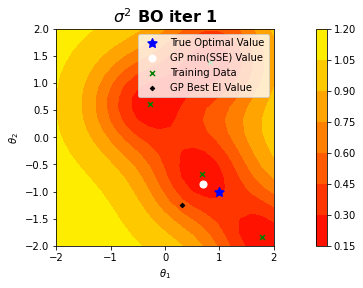

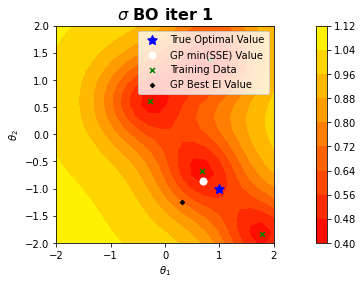

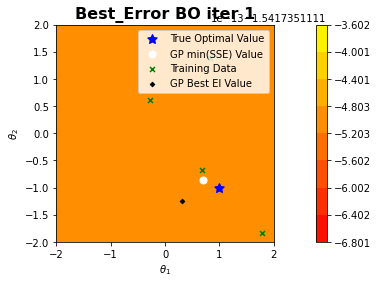

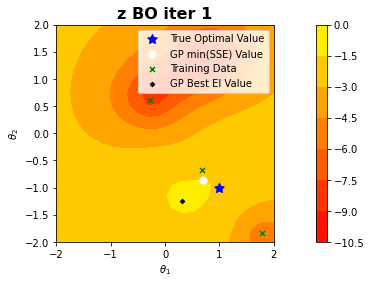

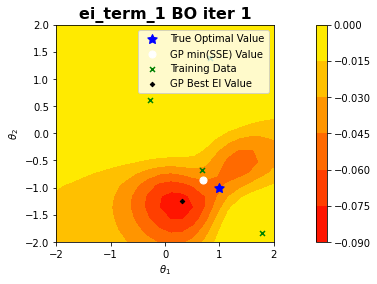

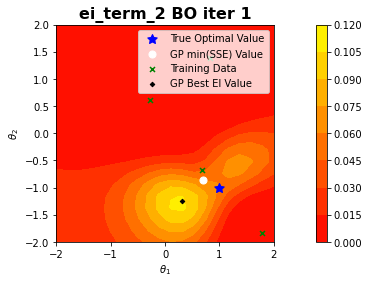

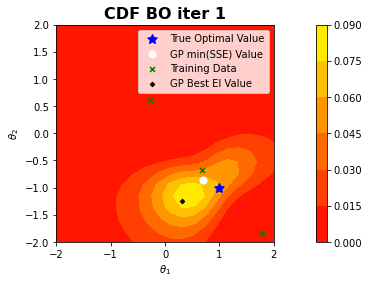

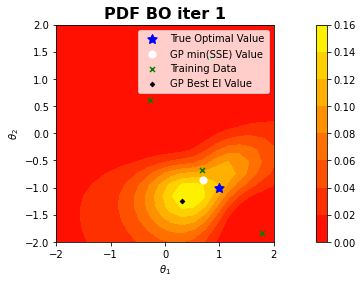

BO Iteration =  2
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.94547592 -0.89395823]
Argmax Theta Best =  [ 0.94736842 -0.94736842]
Scipy Theta Opt =  [ 0.64275495 -0.91177584]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



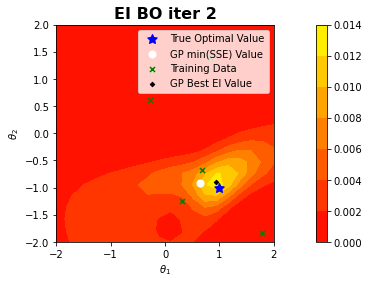

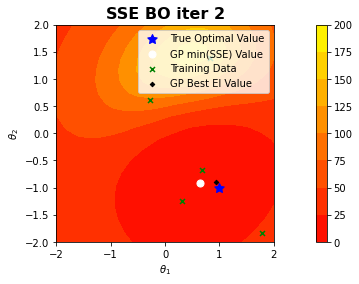

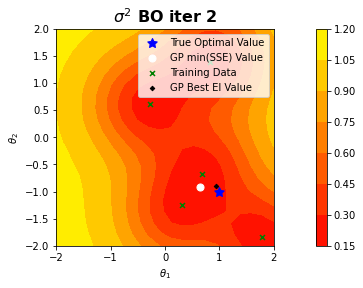

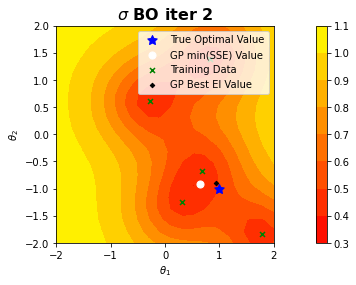

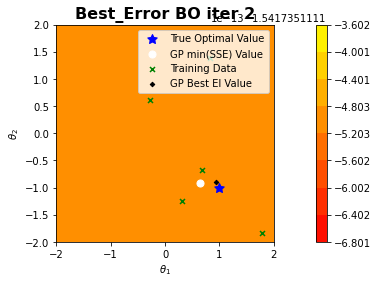

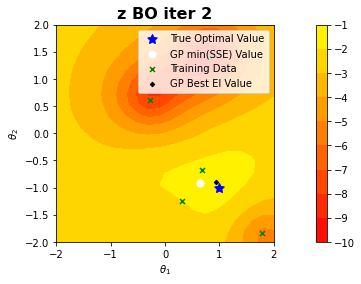

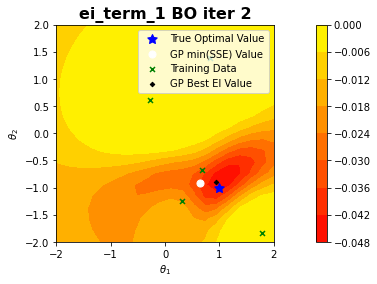

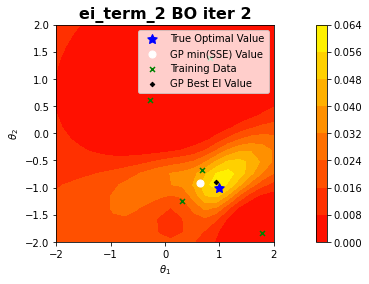

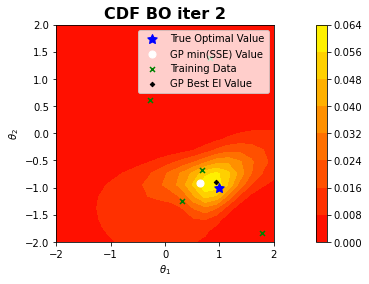

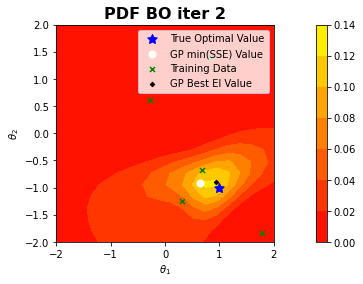

BO Iteration =  3
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 1.57590205 -0.58904848]
Argmax Theta Best =  [ 1.57894737 -0.52631579]
Scipy Theta Opt =  [ 1.19964749 -0.83703072]
Argmin Theta_Opt_GP =  [ 1.15789474 -0.94736842] 



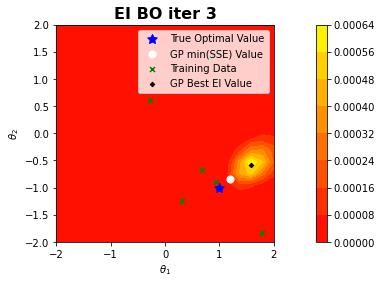

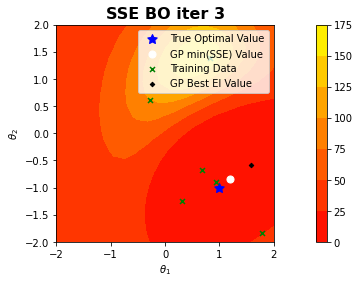

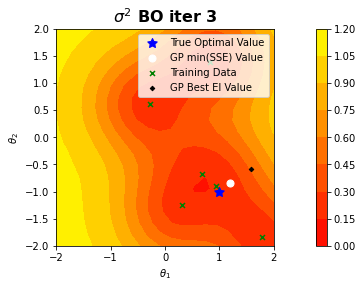

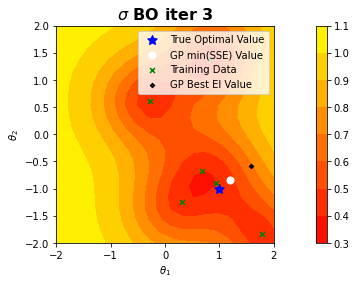

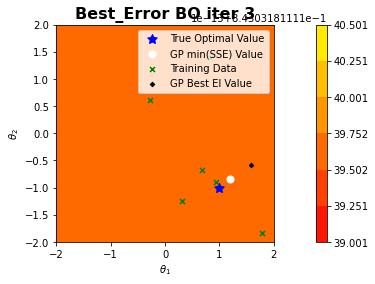

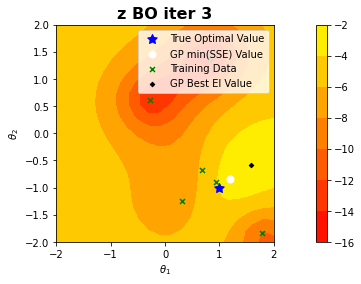

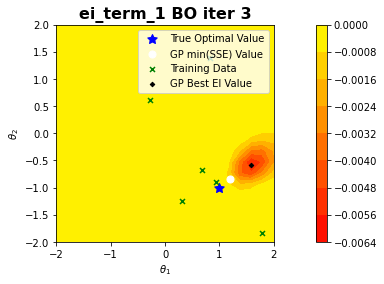

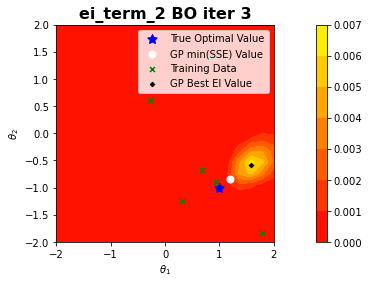

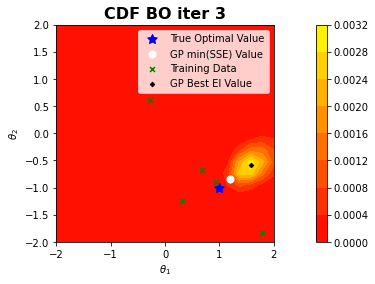

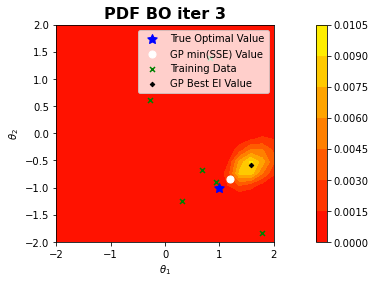

Results (array([ 1.57590205, -0.58904848]), array([ 1.19964749, -0.83703072]))


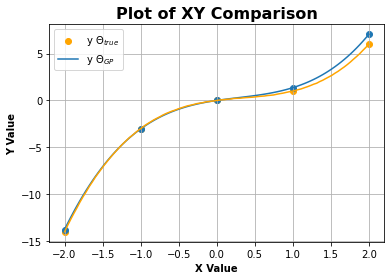

Magnitude of SSE given Theta_Opt =  [ 1.19964749 -0.83703072] is 1.3633e+00


In [4]:
##Objective function = ln(SSE)
##USING SCIPY METHOD
##Uses 4 LHS points

save_fig=True
obj = "LN_obj"

#Pull training data from CSV
train_data_doc = "train_2_ln_obj_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_ln_sse = torch.tensor(train_data[:,-1])
t =len(train_T) #Desired number of training points
t = 4 #Just use last 4 points
train_T = train_T[0:t]
train_ln_sse = train_ln_sse[0:t]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_ln_sse, likelihood)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_ln_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose,save_fig)
    print("Results",BO_Results)
    
    y_GP_Opt = gen_y_Theta_GP(Xexp, BO_Results, q = q_y)
    y_GP_Opt_100 = gen_y_Theta_GP(X_line, BO_Results, q = q_y)                         
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_GP_Opt_100,y_true, title)
    
    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", "{:.4e}".format(Error_mag))

BO Iteration =  1
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.80201741 -0.93304131]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.80199912 -0.93304508]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



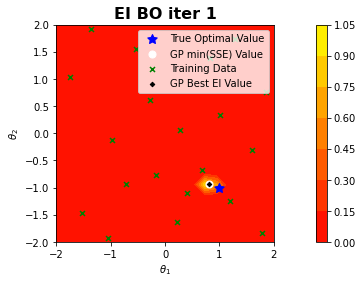

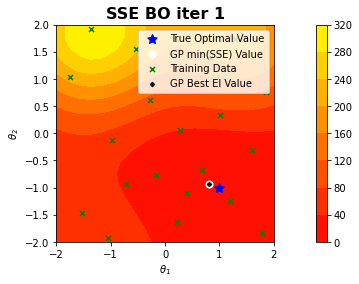

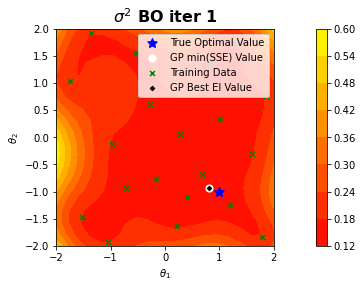

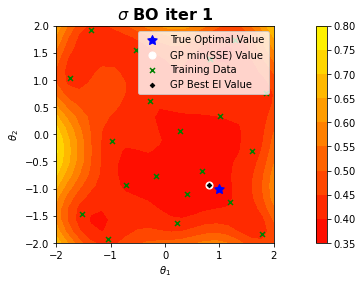

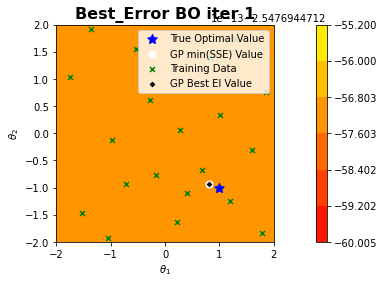

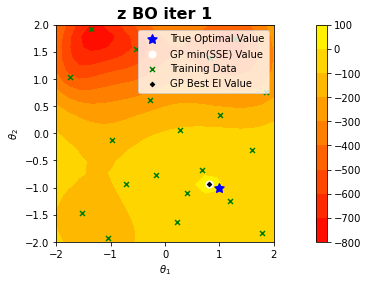

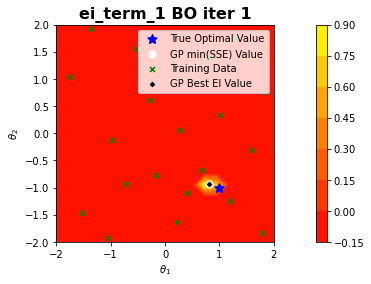

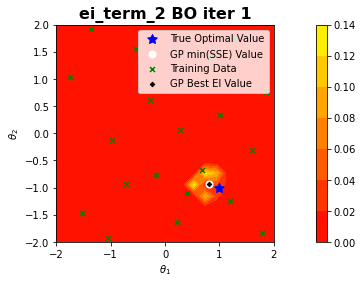

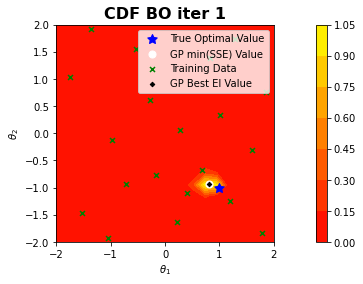

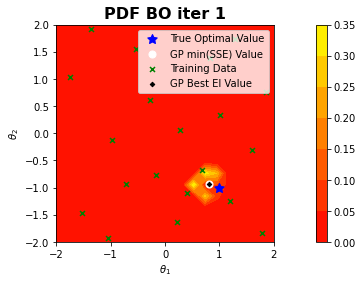

BO Iteration =  2
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.80748624 -0.93193513]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.80532769 -0.9323843 ]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



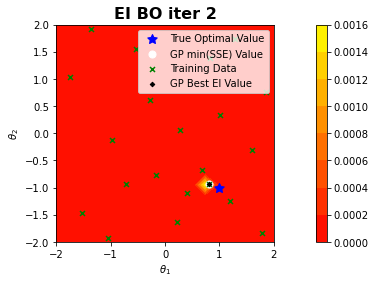

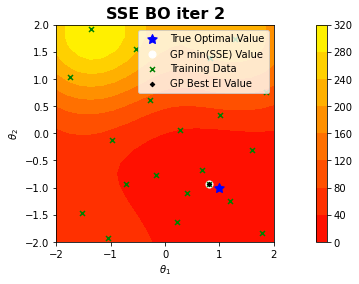

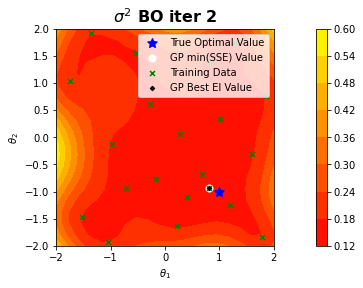

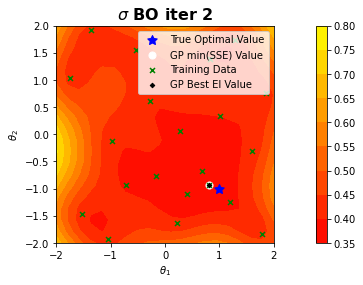

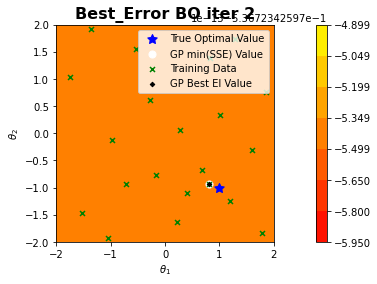

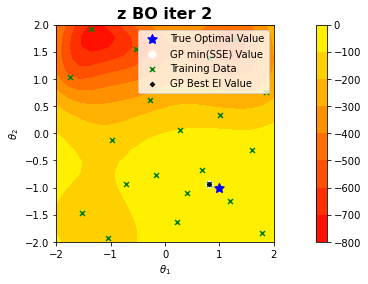

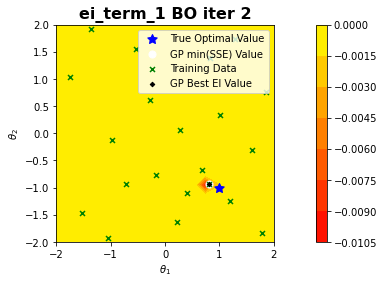

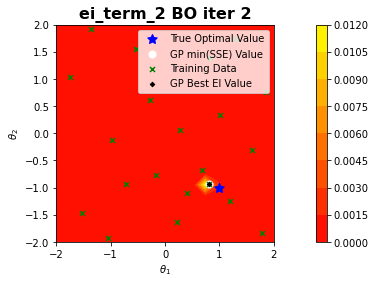

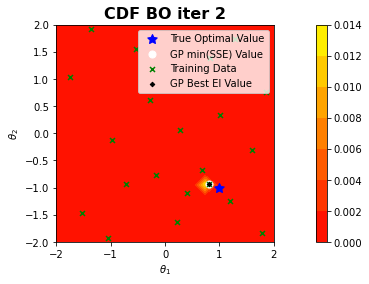

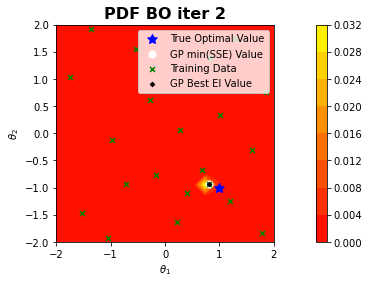

BO Iteration =  3
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.80868475 -0.93170833]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.80722737 -0.93201132]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



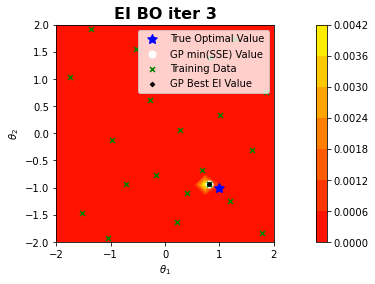

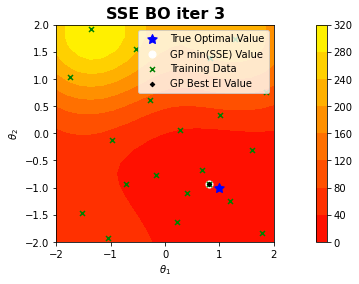

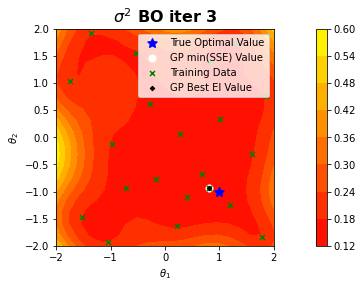

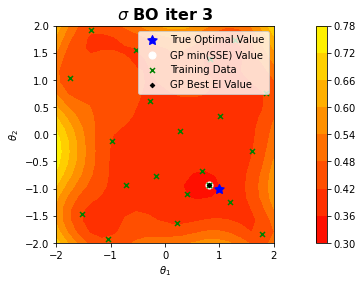

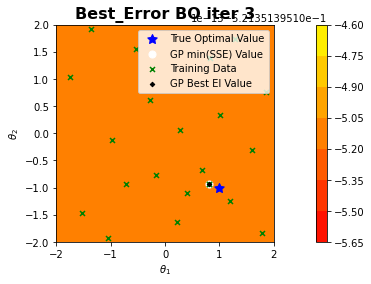

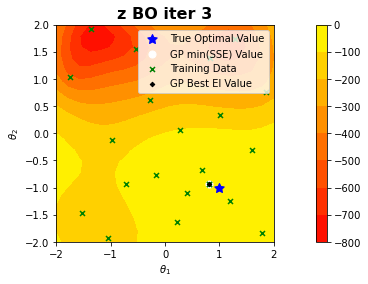

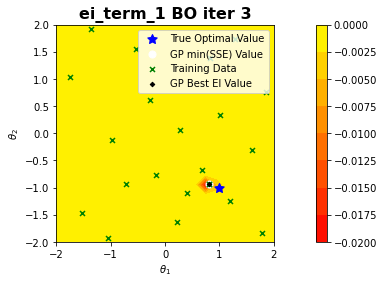

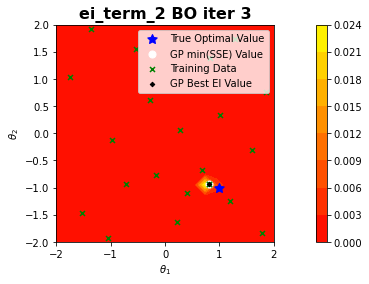

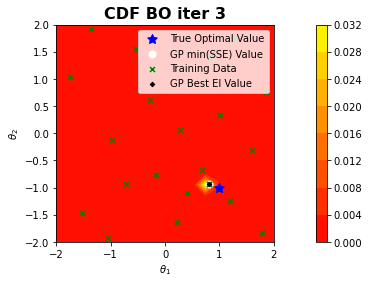

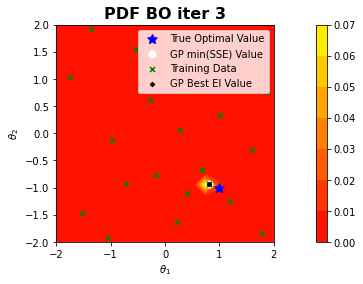

(array([ 0.80868475, -0.93170833]), array([ 0.80722737, -0.93201132]))


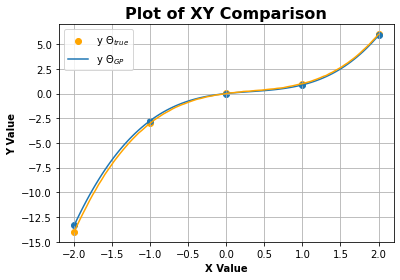

Magnitude of SSE given Theta_Opt =  [ 0.80722737 -0.93201132] is 5.2195e-01
BO Iteration =  1
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.80203421 -0.93303787]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.80199912 -0.93304508]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



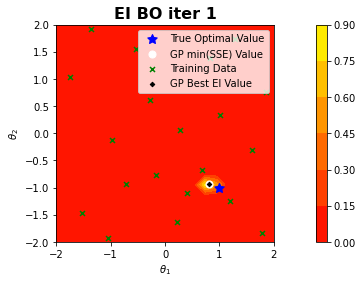

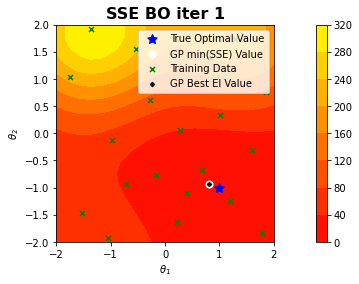

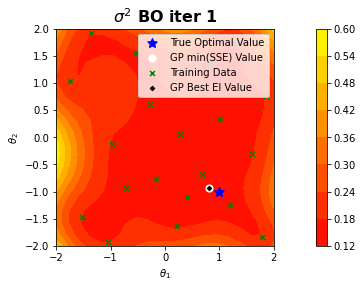

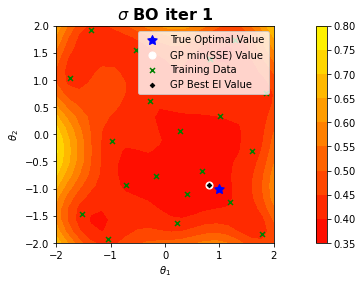

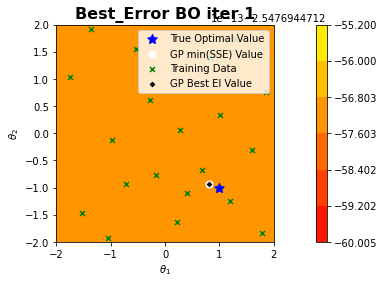

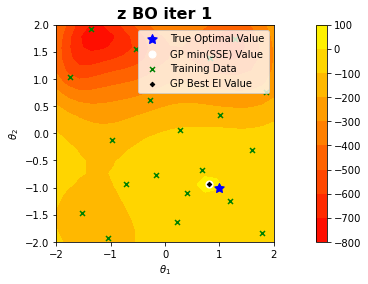

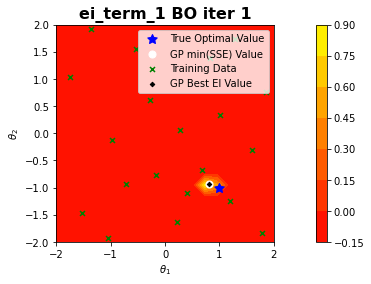

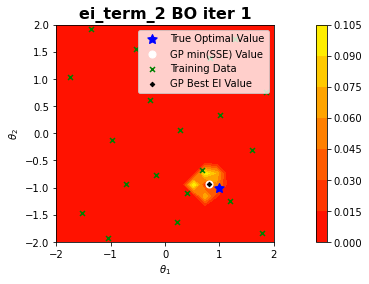

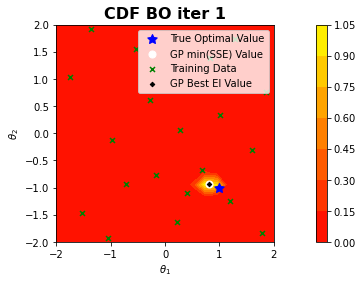

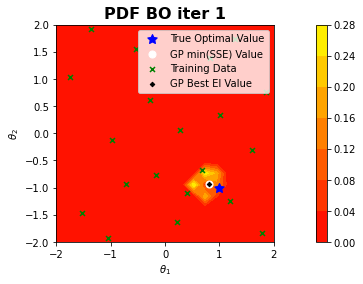

BO Iteration =  2
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.80771328 -0.93189239]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.80532835 -0.93238419]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



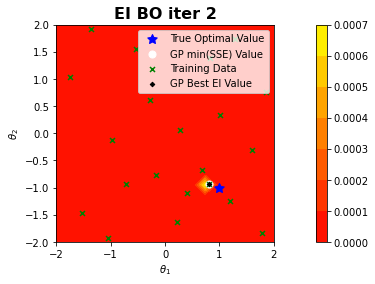

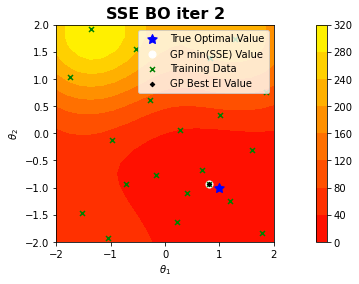

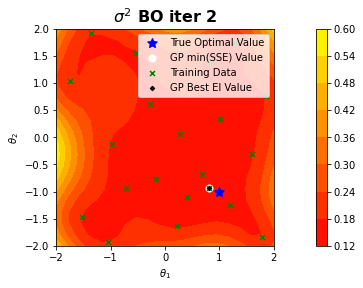

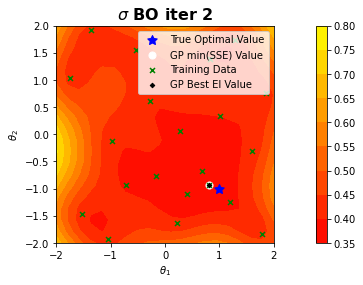

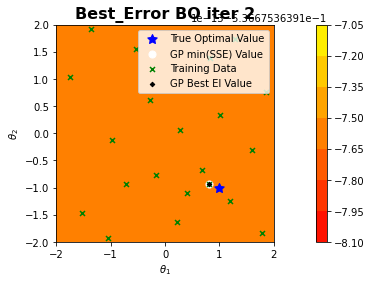

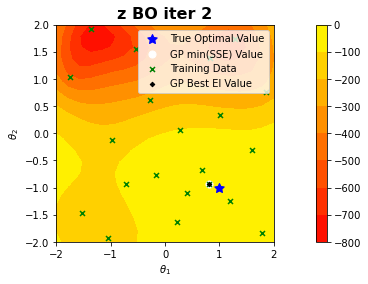

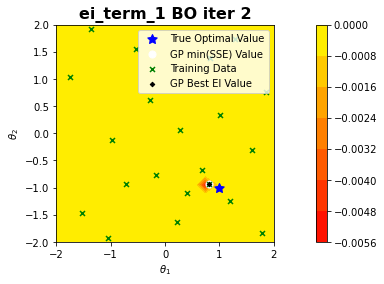

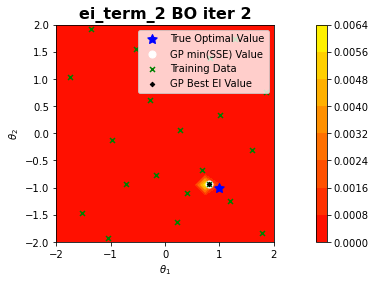

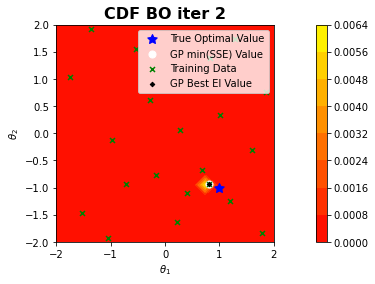

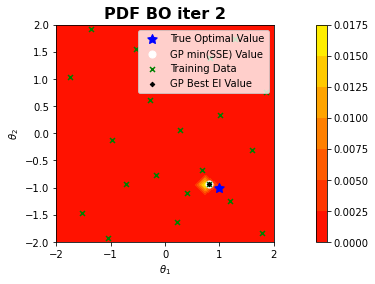

BO Iteration =  3
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.80887086 -0.93166956]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.80723521 -0.93200994]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



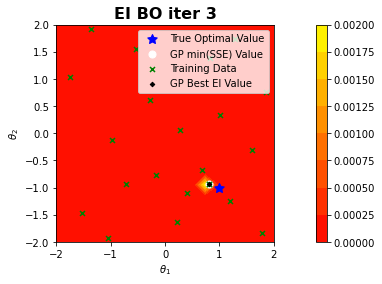

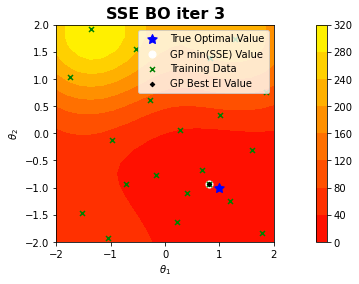

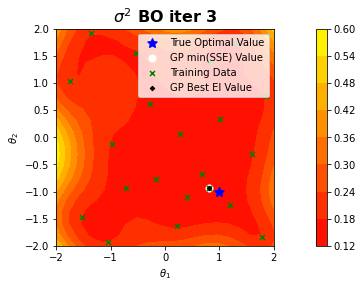

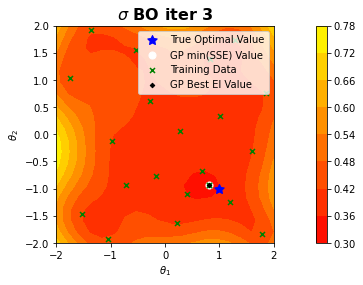

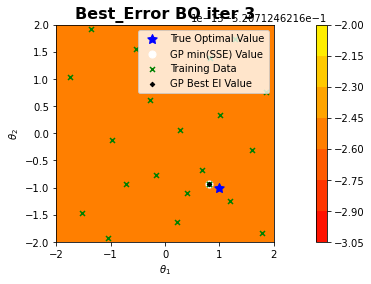

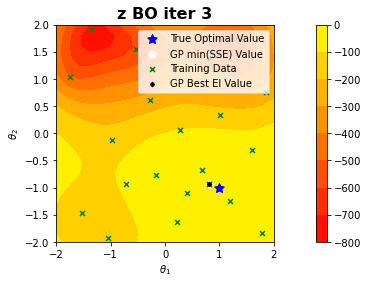

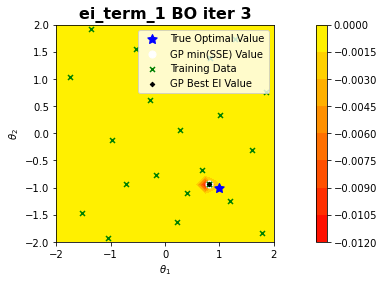

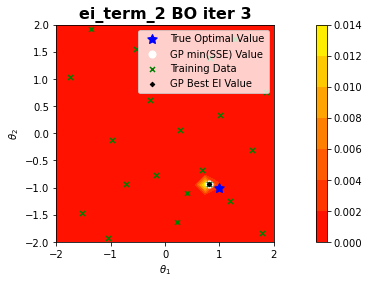

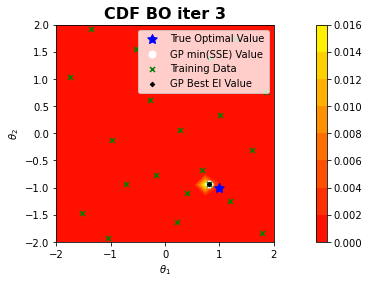

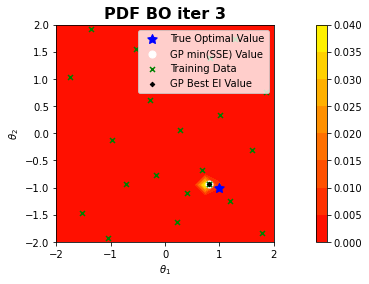

(array([ 0.80887086, -0.93166956]), array([ 0.80723521, -0.93200994]))


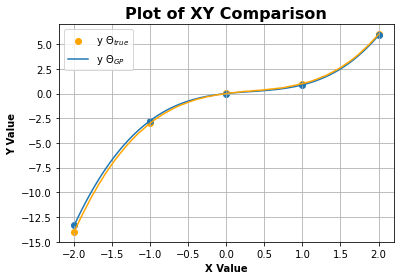

Magnitude of SSE given Theta_Opt =  [ 0.80723521 -0.93200994] is 5.2193e-01
BO Iteration =  1
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.80225263 -0.93299306]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.80199912 -0.93304508]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



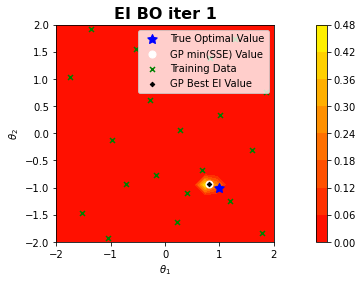

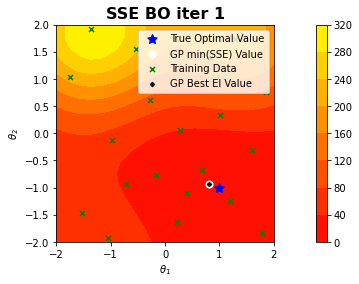

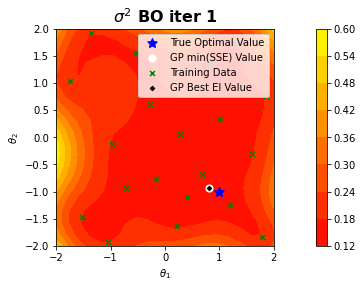

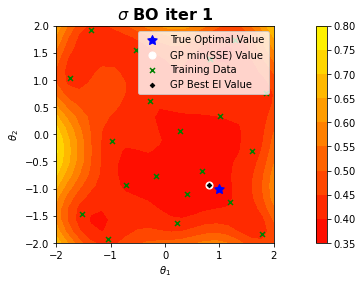

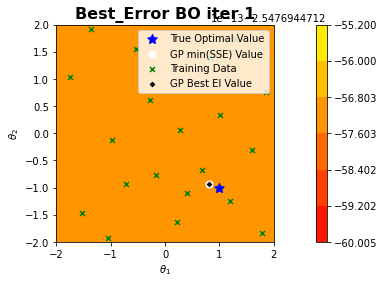

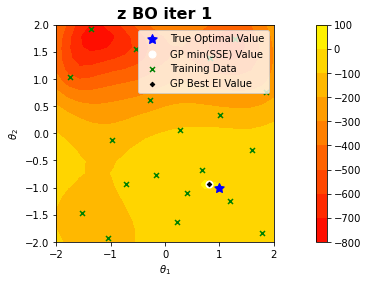

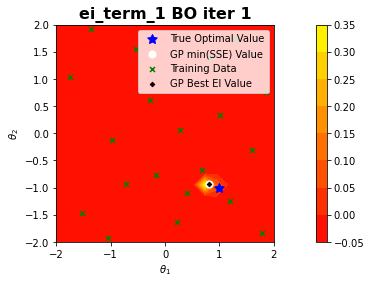

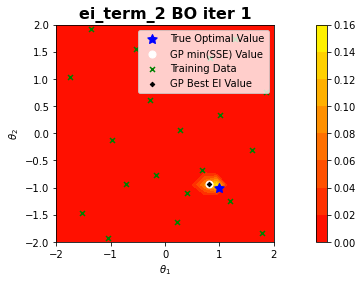

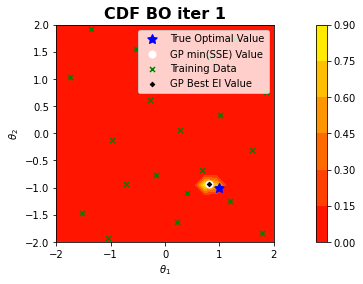

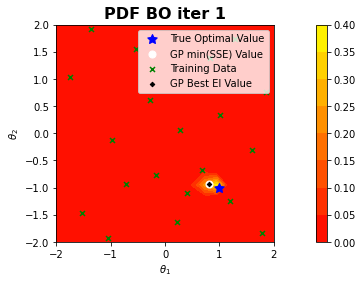

BO Iteration =  2
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.80881706 -0.93186028]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.80533741 -0.93238253]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



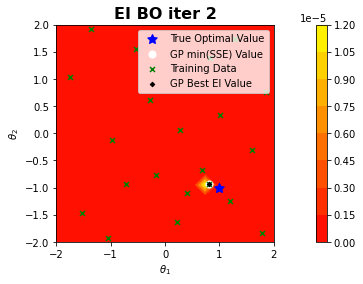

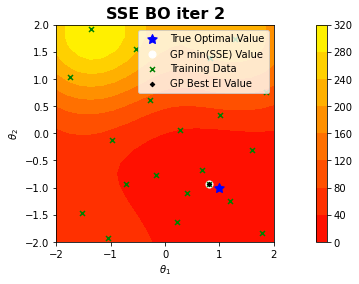

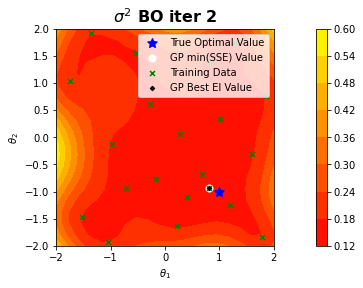

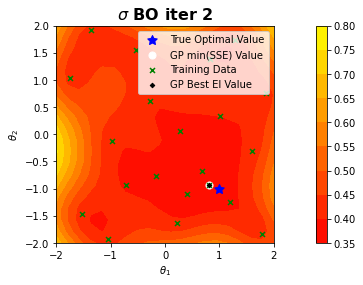

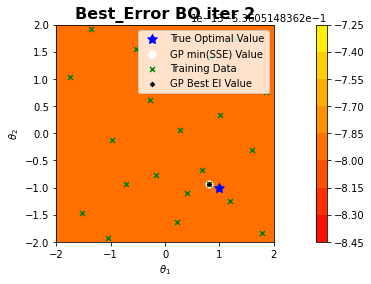

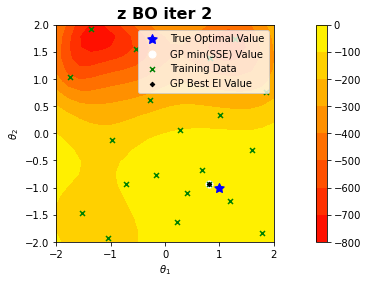

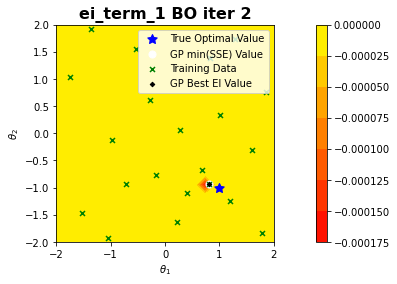

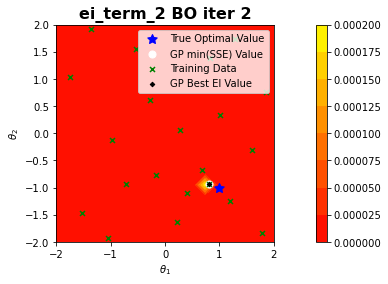

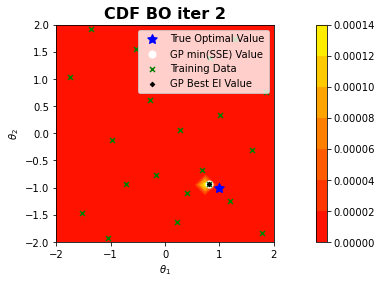

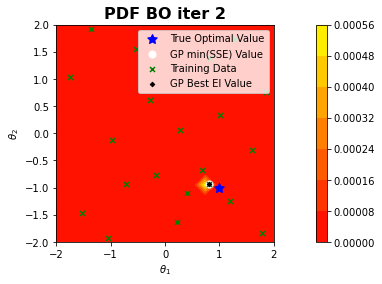

BO Iteration =  3
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.80964995 -0.93151548]
Argmax Theta Best =  [ 0.73684211 -0.94736842]
Scipy Theta Opt =  [ 0.80727946 -0.93200503]
Argmin Theta_Opt_GP =  [ 0.73684211 -0.94736842] 



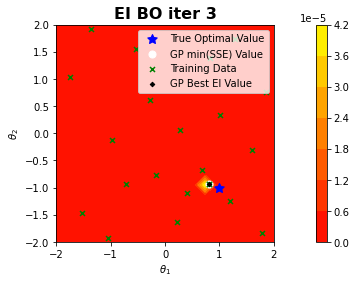

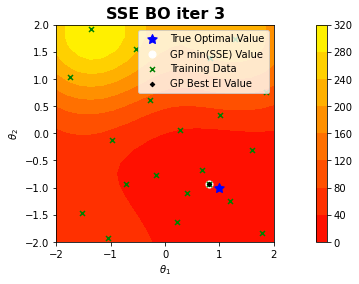

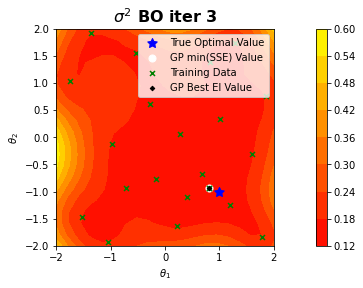

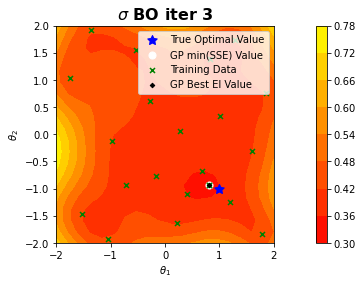

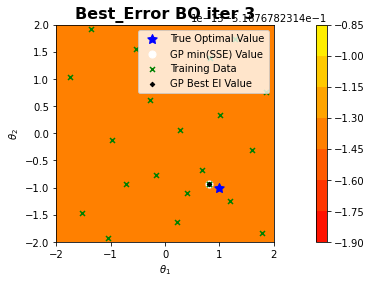

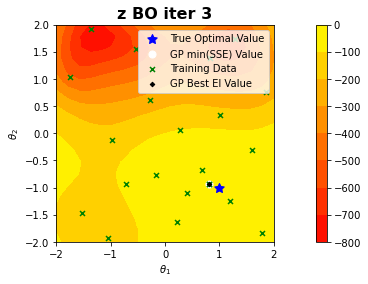

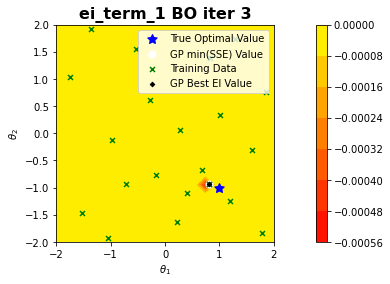

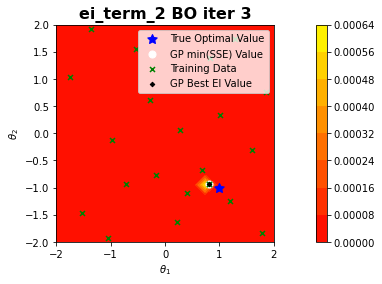

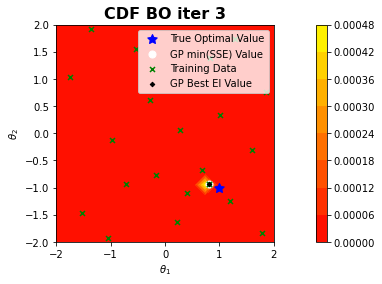

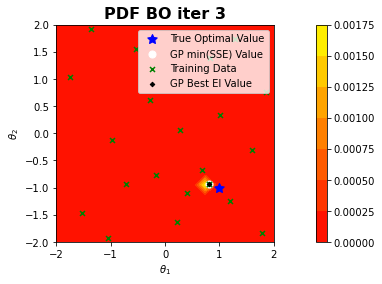

(array([ 0.80964995, -0.93151548]), array([ 0.80727946, -0.93200503]))


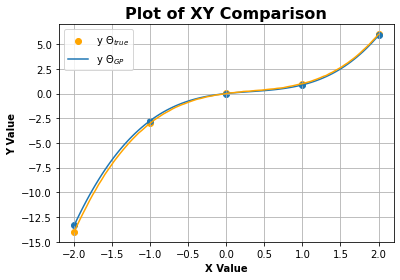

Magnitude of SSE given Theta_Opt =  [ 0.80727946 -0.93200503] is 5.2178e-01


In [5]:
##Objective function = SSE
##USING SCIPY METHOD
##Uses 19 LHS Training points
save_fig=True
obj = "obj"

#Set 19 Point Training data, Model, and Likelihood
#Pull training data from CSV
train_data_doc = "train_2_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_sse = torch.tensor(train_data[:,-1])
t =len(train_T) #Desired number of training points
# t = 4
train_T = train_T[0:t]
train_sse = train_sse[0:t]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

from bo_functions import train_GP_model
train_GP_model(model, likelihood, train_T, train_sse, iterations, verbose=False)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose,save_fig)
    print(BO_Results)
    
    y_GP_Opt = gen_y_Theta_GP(Xexp, BO_Results, q = q_y)
    y_GP_Opt_100 = gen_y_Theta_GP(X_line, BO_Results, q = q_y)                         
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_GP_Opt_100,y_true, title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", "{:.4e}".format(Error_mag))

BO Iteration =  1
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.40476628 -1.20671889]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.4047662  -1.20671888]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



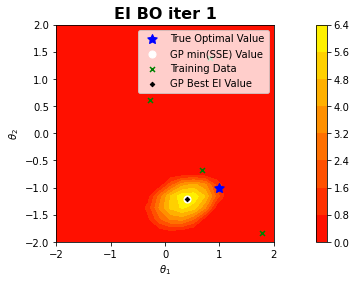

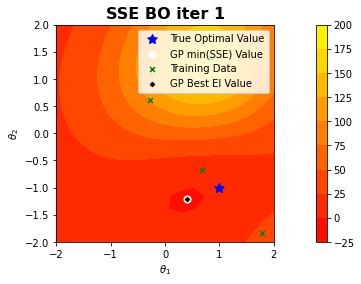

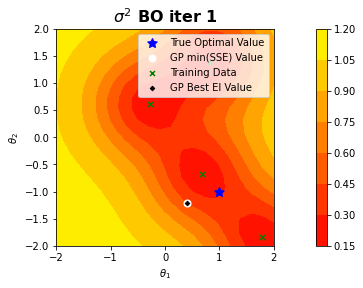

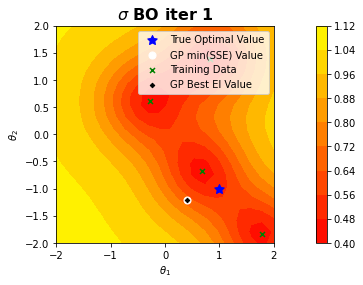

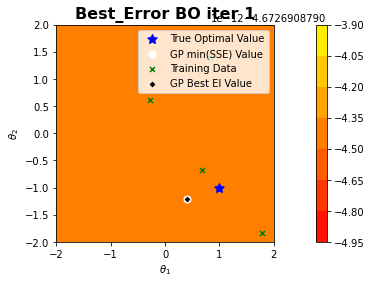

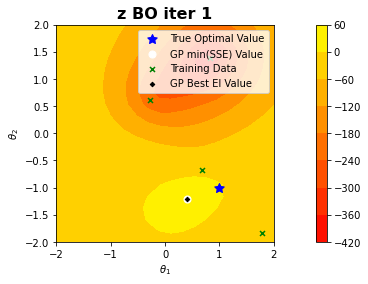

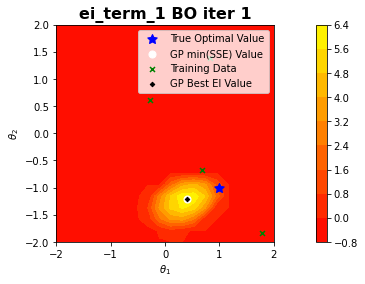

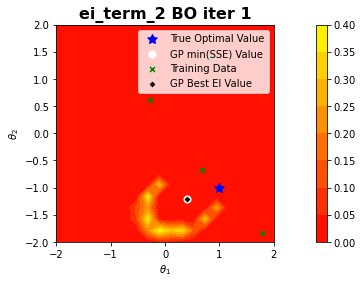

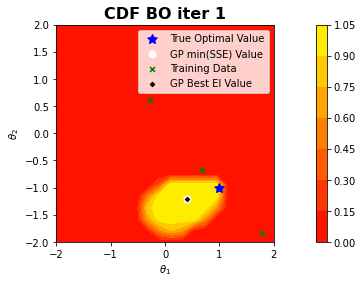

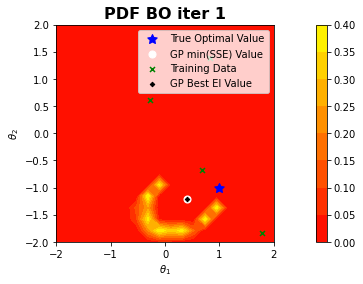

BO Iteration =  2
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.5834369  -1.09380032]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.58343704 -1.09380008]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



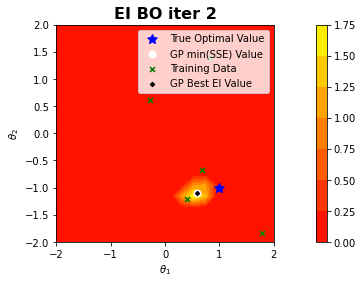

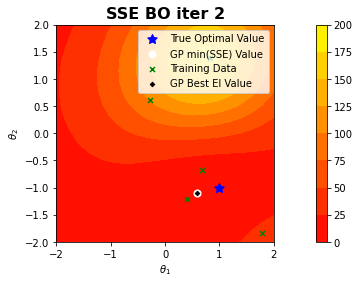

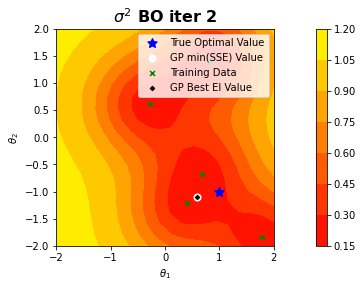

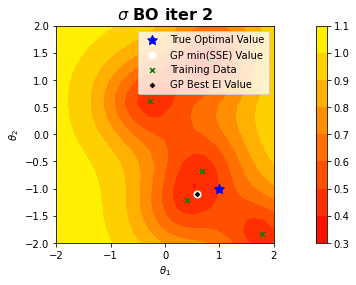

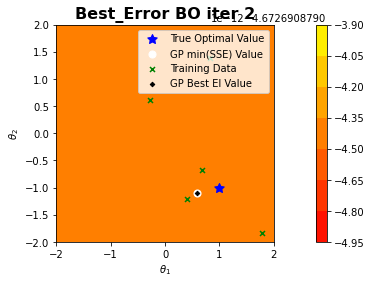

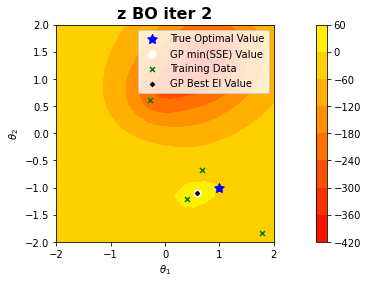

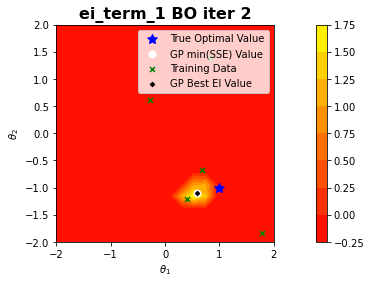

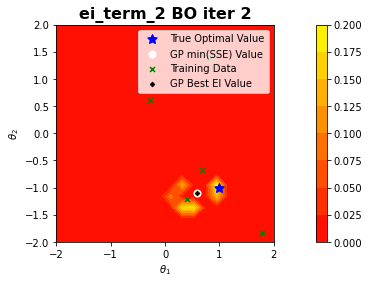

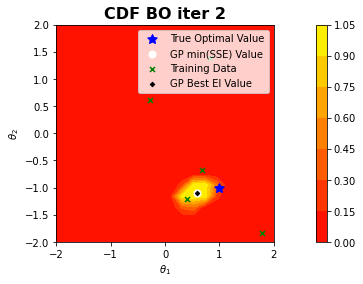

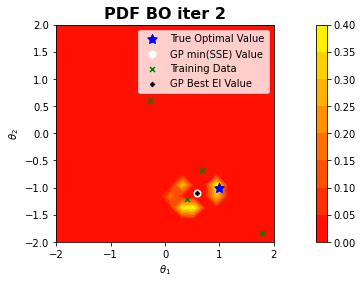

BO Iteration =  3
Exploration Bias =  tensor(0.)
Scipy Theta Best =  [ 0.59375182 -1.09777984]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.58934911 -1.09633802]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



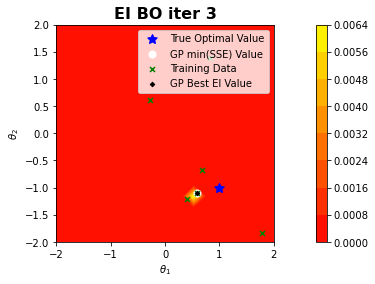

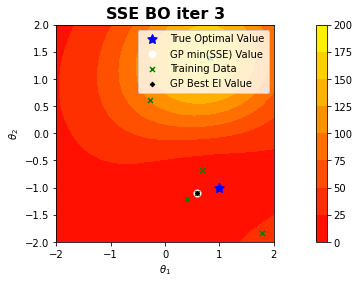

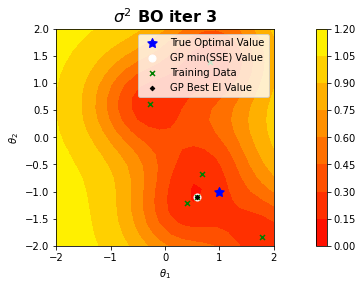

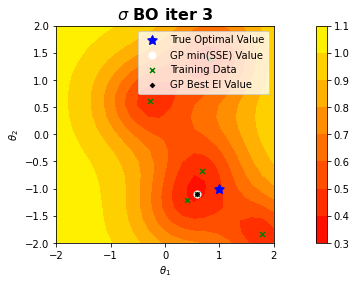

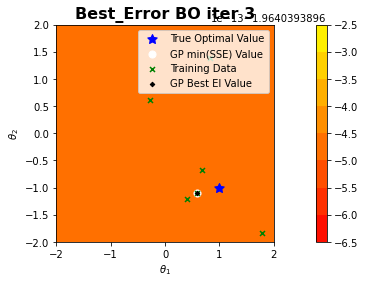

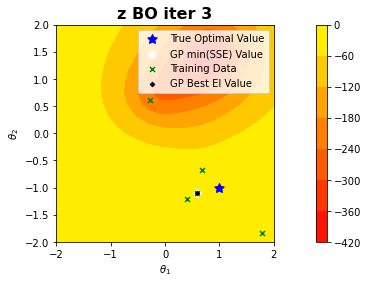

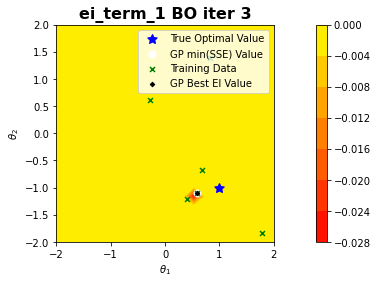

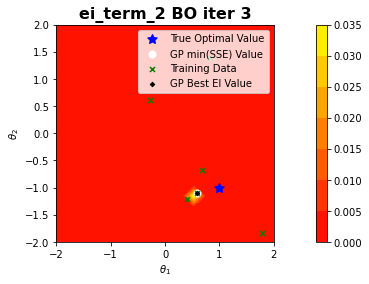

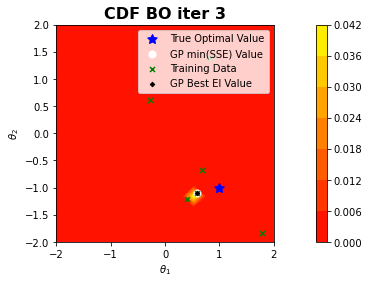

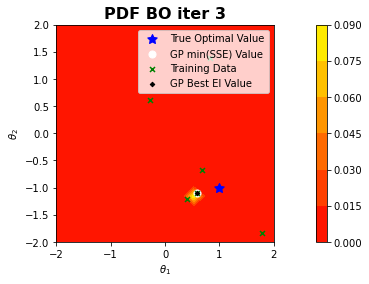

(array([ 0.59375182, -1.09777984]), array([ 0.58934911, -1.09633802]))


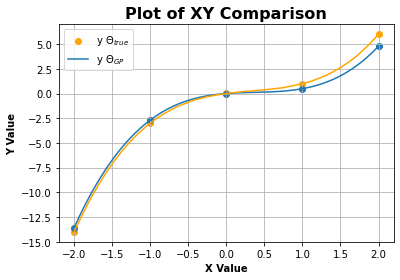

Magnitude of SSE given Theta_Opt =  [ 0.58934911 -1.09633802] is 1.9317e+00
BO Iteration =  1
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.40476627 -1.20671889]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.4047662  -1.20671888]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



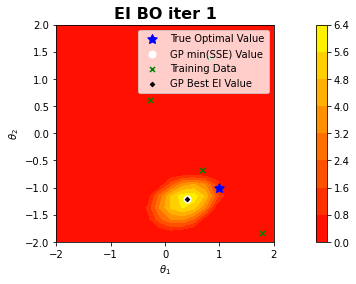

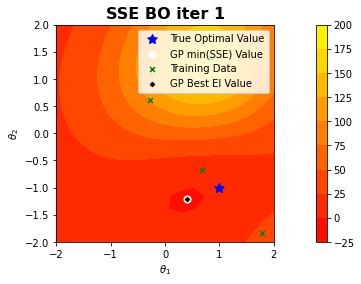

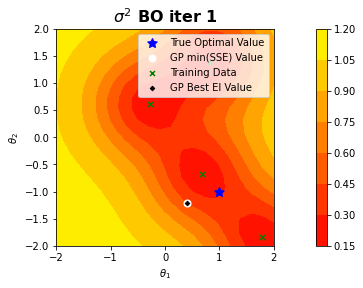

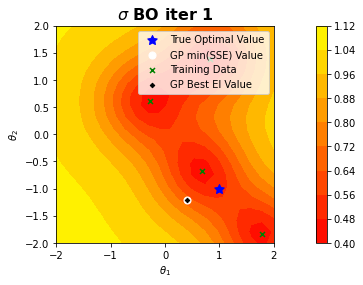

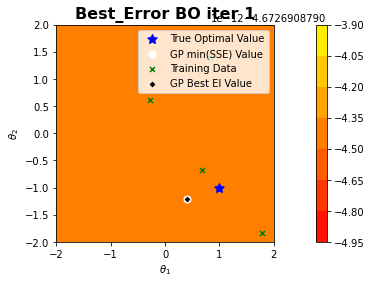

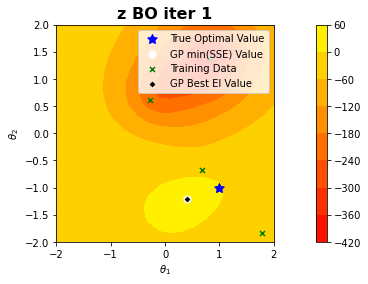

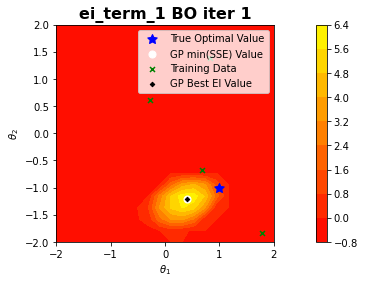

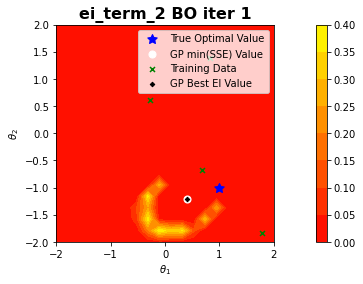

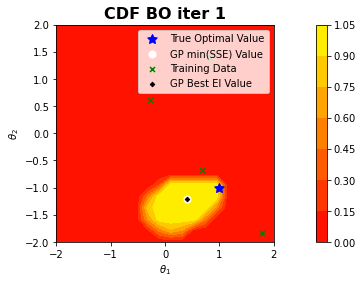

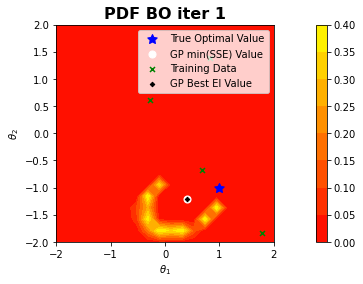

BO Iteration =  2
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.58343688 -1.09380041]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.58343702 -1.09380009]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



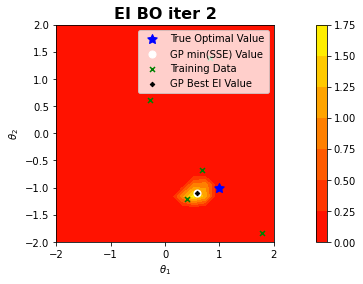

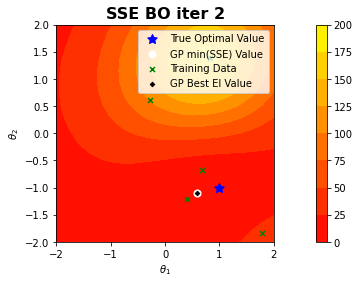

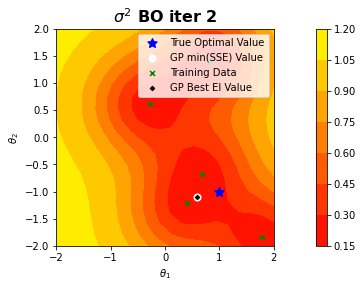

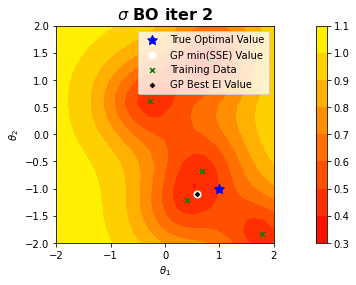

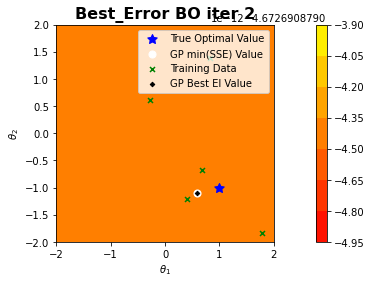

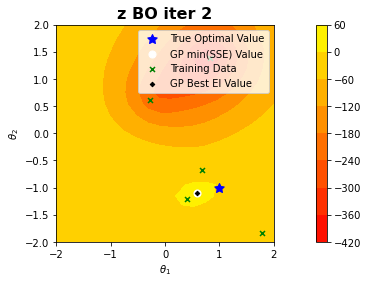

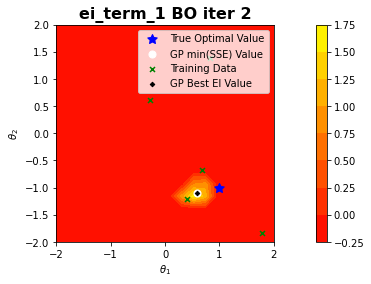

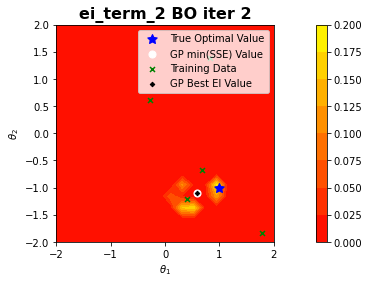

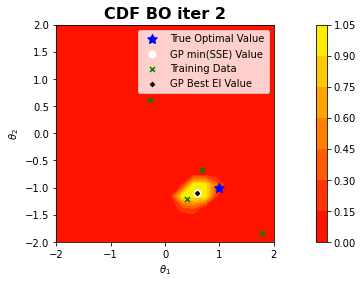

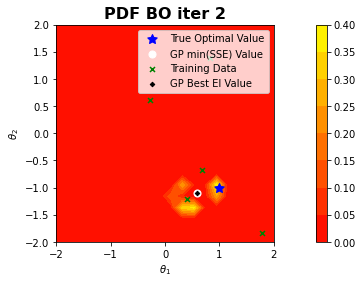

BO Iteration =  3
Exploration Bias =  tensor(0.1000)
Scipy Theta Best =  [ 0.59434379 -1.09795743]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.5893491  -1.09633803]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



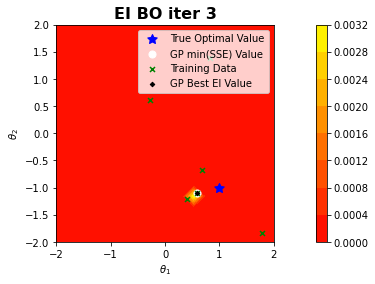

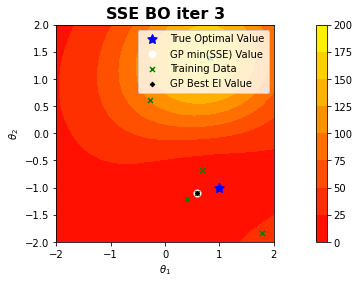

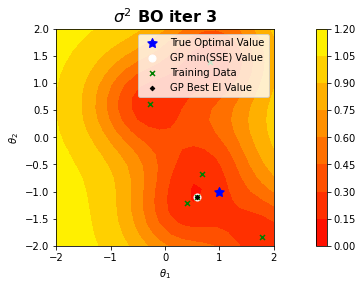

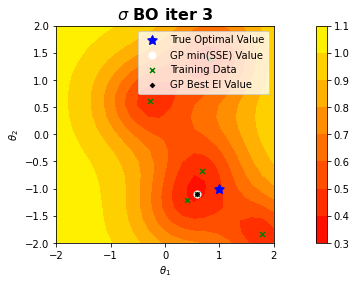

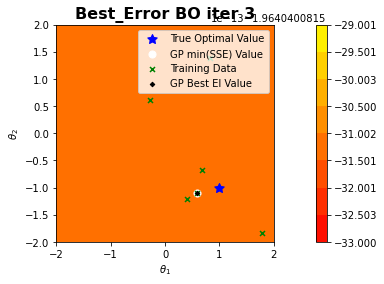

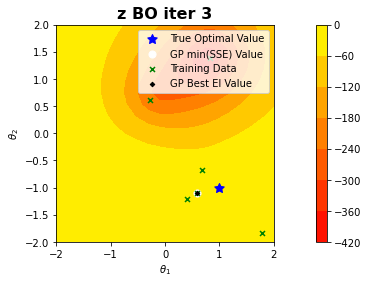

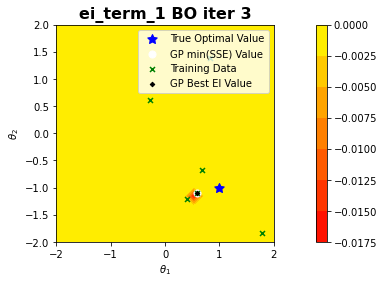

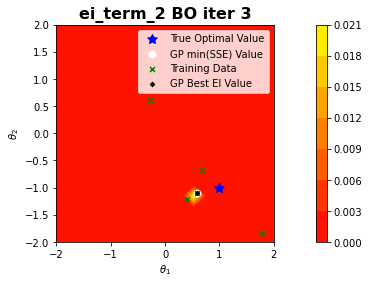

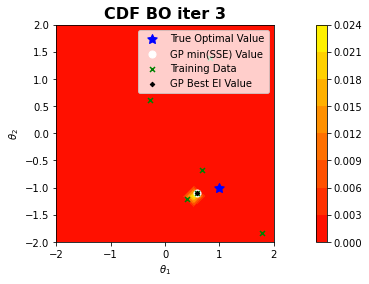

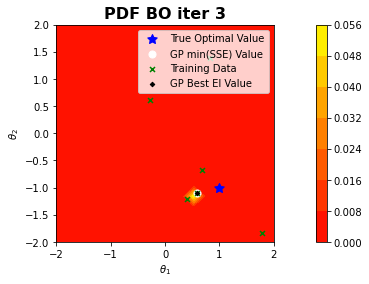

(array([ 0.59434379, -1.09795743]), array([ 0.5893491 , -1.09633803]))


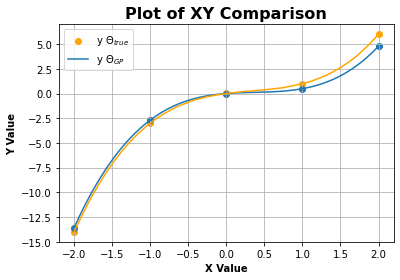

Magnitude of SSE given Theta_Opt =  [ 0.5893491  -1.09633803] is 1.9317e+00
BO Iteration =  1
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.40476627 -1.20671888]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.4047662  -1.20671888]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



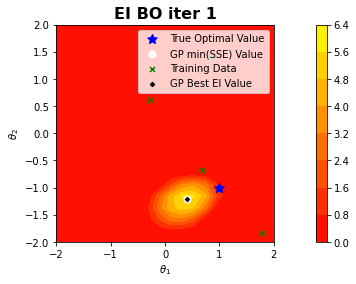

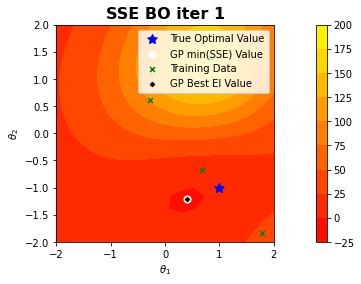

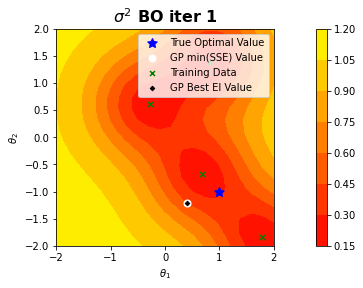

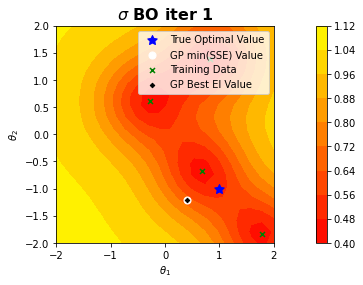

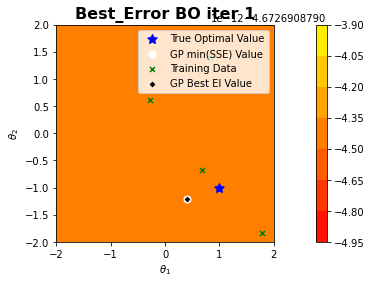

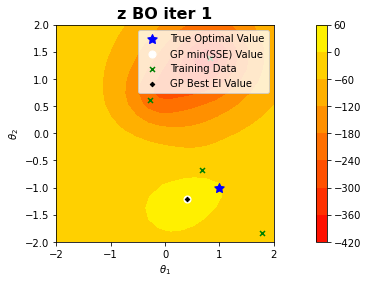

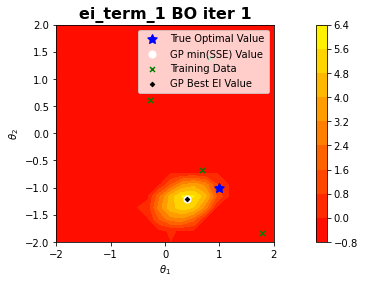

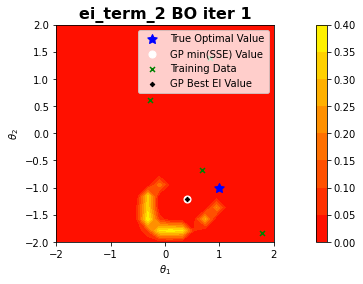

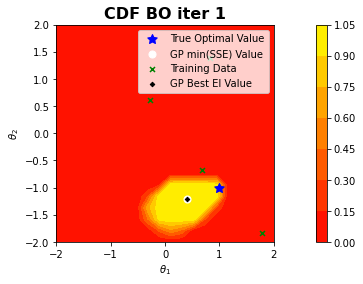

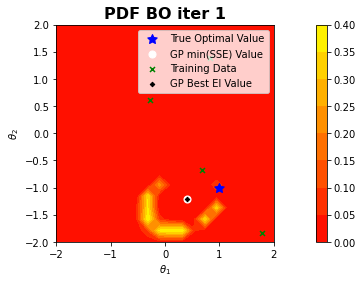

BO Iteration =  2
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.58344101 -1.09380226]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.58343701 -1.09380009]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



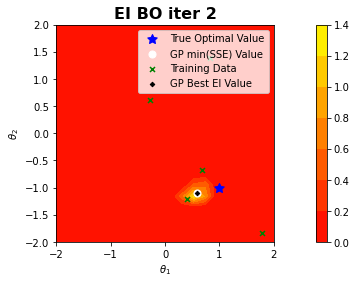

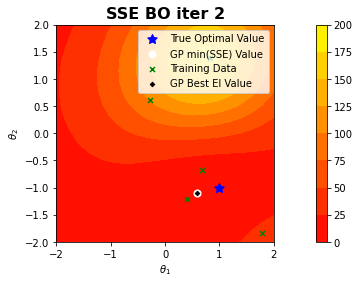

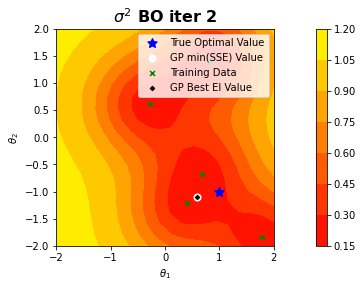

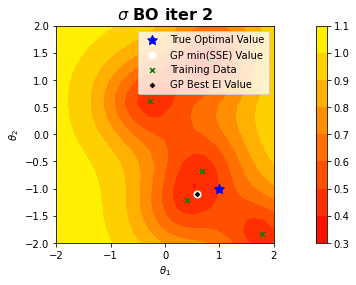

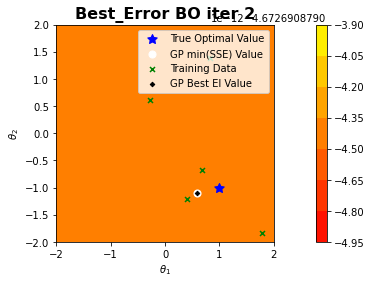

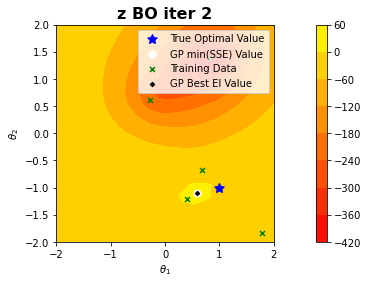

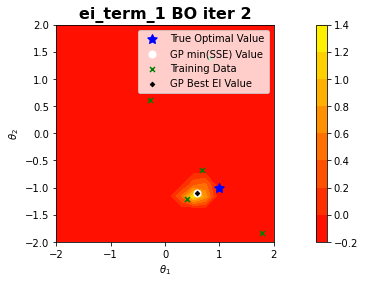

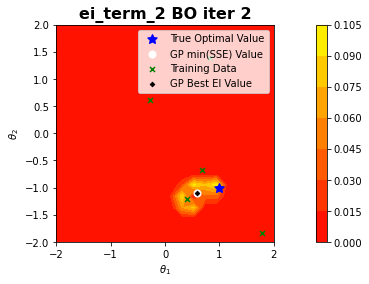

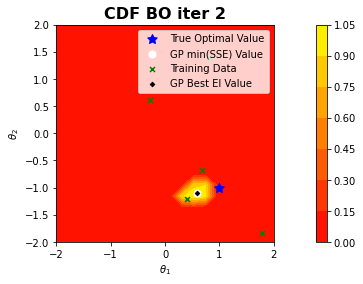

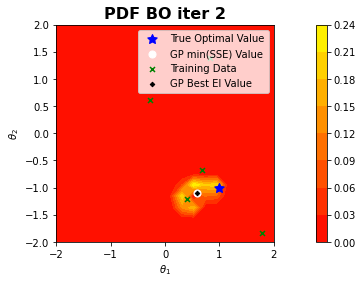

BO Iteration =  3
Exploration Bias =  tensor(0.5000)
Scipy Theta Best =  [ 0.59713354 -1.09864684]
Argmax Theta Best =  [ 0.52631579 -1.15789474]
Scipy Theta Opt =  [ 0.58934975 -1.09633807]
Argmin Theta_Opt_GP =  [ 0.52631579 -1.15789474] 



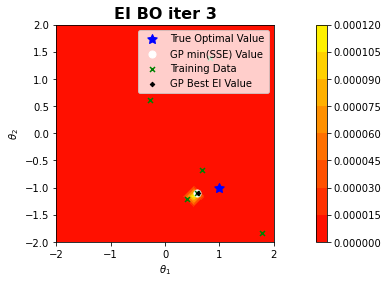

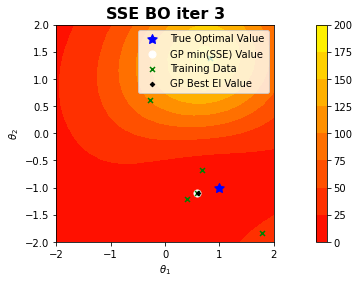

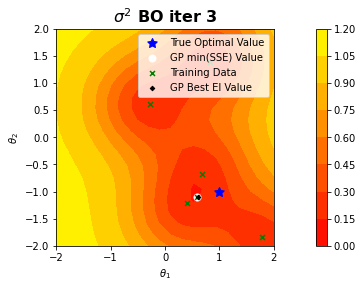

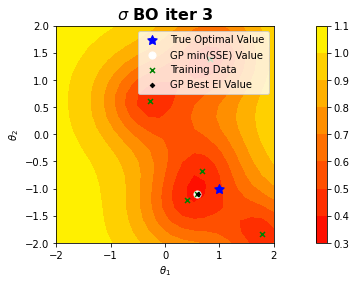

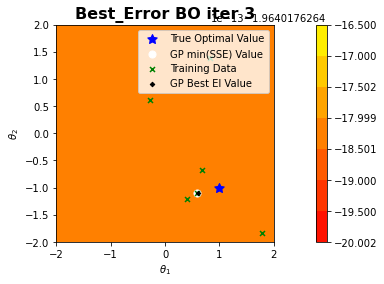

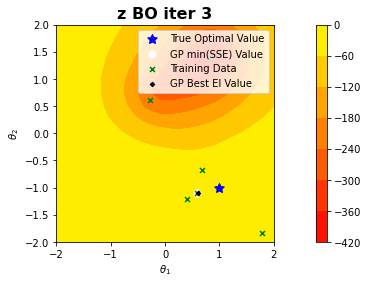

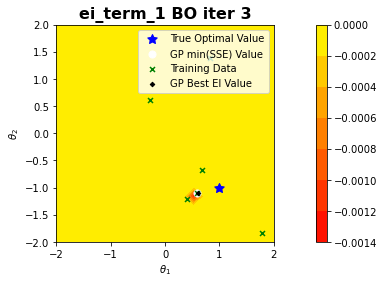

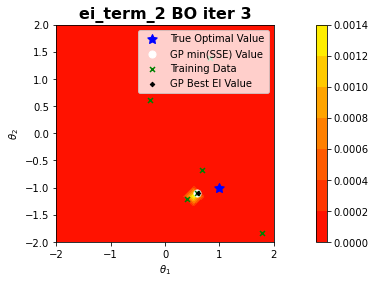

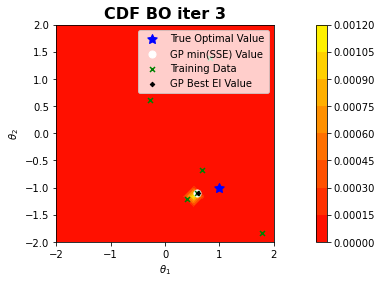

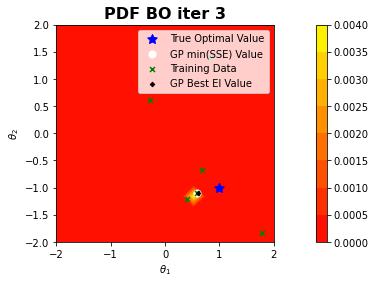

(array([ 0.59713354, -1.09864684]), array([ 0.58934975, -1.09633807]))


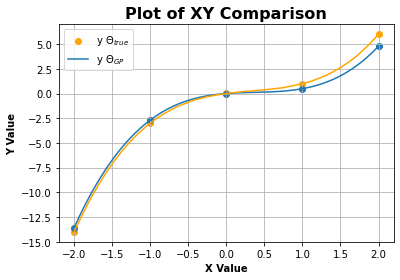

Magnitude of SSE given Theta_Opt =  [ 0.58934975 -1.09633807] is 1.9317e+00


In [6]:
##Objective function = SSE
##USING SCIPY METHOD
##Uses 4 LHS Training points
obj = "obj"
save_fig=True
#Set 4 Point Training data, Model, and Likelihood
#Pull training data from CSV
train_data_doc = "train_2_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
train_T = torch.tensor(train_data[:,1:3])
train_sse = torch.tensor(train_data[:,-1])
t =len(train_T) #Desired number of training points
t = 4
train_T = train_T[0:t]
train_sse = train_sse[0:t]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

from bo_functions import train_GP_model
train_GP_model(model, likelihood, train_T, train_sse, iterations, verbose=False)

for i in range(len(explore_bias)):
    BO_Results =  bo_iter(BO_iters, train_T, train_sse, p,q, theta_mesh, Theta_True, iterations, explore_bias[i], Xexp, Yexp,obj, verbose,save_fig)
    print(BO_Results)
    
    y_GP_Opt = gen_y_Theta_GP(Xexp, BO_Results, q = q_y)
    y_GP_Opt_100 = gen_y_Theta_GP(X_line, BO_Results, q = q_y)                         
    plot_xy(X_line,Xexp, Yexp, y_GP_Opt,y_GP_Opt_100,y_true, title)

    Error_mag = np.sum((y_GP_Opt-Yexp)**2)
    print("Magnitude of SSE given Theta_Opt = ",BO_Results[1], "is", "{:.4e}".format(Error_mag))